In [1]:
import os
import pandas as pd
import numpy as np
import utils
from sklearn.model_selection import cross_val_score
import h2o
from h2o.automl import H2OAutoML
from matplotlib import pyplot as plt

C:\Users\47901\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# Data generation
Data has many columns with weather data, they are explained here: https://www.meteomatics.com/en/api/available-parameters/alphabetic-list



In [13]:
train_a = pd.read_parquet('data/A/train_targets.parquet')
train_b = pd.read_parquet('data/B/train_targets.parquet')
train_c = pd.read_parquet('data/C/train_targets.parquet')

In [14]:
X_train_estimated_a = pd.read_parquet('data/A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('data/B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('data/C/X_train_estimated.parquet')


In [15]:
X_train_observed_a = pd.read_parquet('data/A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('data/B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('data/C/X_train_observed.parquet')


In [16]:
X_test_estimated_a = pd.read_parquet('data/A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('data/B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('data/C/X_test_estimated.parquet')


<Axes: title={'center': 'Train/Test  C'}, xlabel='date_forecast'>

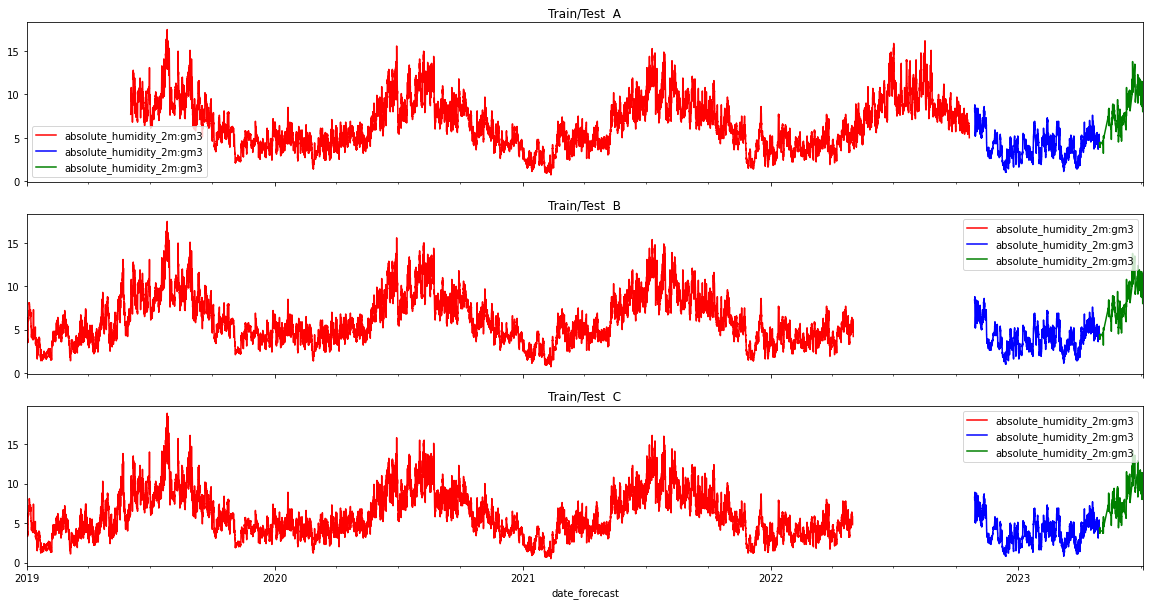

In [8]:

# Plotting a single feature
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = 'absolute_humidity_2m:gm3'
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')



In [17]:
# Explore location A
max_date = X_train_observed_a['date_forecast'].iloc[-1]
print(max_date)
train_a["time"] = pd.to_datetime(train_a['time'])
filtered_df_a = train_a[train_a['time'] <= max_date]

X_train_observed_a['date_forecast'] = pd.to_datetime(X_train_observed_a['date_forecast'])
X_train_observed_a.set_index('date_forecast', inplace=True)

hourly_X_train_obs_a = X_train_observed_a.resample('H').mean()
hourly_X_train_obs_a = hourly_X_train_obs_a.iloc[:-1]

# Explore location B
max_date = X_train_observed_b['date_forecast'].iloc[-1]
print(max_date)
train_b["time"] = pd.to_datetime(train_b['time'])
filtered_df_b = train_b[train_b['time'] <= max_date]

X_train_observed_b['date_forecast'] = pd.to_datetime(X_train_observed_b['date_forecast'])
X_train_observed_b.set_index('date_forecast', inplace=True)

hourly_X_train_obs_b = X_train_observed_b.resample('H').mean()
hourly_X_train_obs_b = hourly_X_train_obs_b.iloc[:-1]

# Explore location C
max_date = X_train_observed_c['date_forecast'].iloc[-1]
print(max_date)
train_c["time"] = pd.to_datetime(train_c['time'])
filtered_df_c = train_c[train_c['time'] <= max_date]

X_train_observed_c['date_forecast'] = pd.to_datetime(X_train_observed_c['date_forecast'])
X_train_observed_c.set_index('date_forecast', inplace=True)

hourly_X_train_obs_c = X_train_observed_c.resample('H').mean()
hourly_X_train_obs_c = hourly_X_train_obs_c.iloc[:-1]


2022-10-21 01:00:00
2022-05-03 00:00:00
2022-05-01 22:00:00


5733.42
date_forecast
2019-06-02 22:00:00    7.700
2019-06-02 23:00:00    7.700
2019-06-03 00:00:00    7.875
2019-06-03 01:00:00    8.425
2019-06-03 02:00:00    8.950
                       ...  
2022-10-20 20:00:00    5.800
2022-10-20 21:00:00    5.575
2022-10-20 22:00:00    5.350
2022-10-20 23:00:00    5.200
2022-10-21 00:00:00    5.000
Freq: H, Name: absolute_humidity_2m:gm3, Length: 29667, dtype: float32
Column Name :  absolute_humidity_2m:gm3


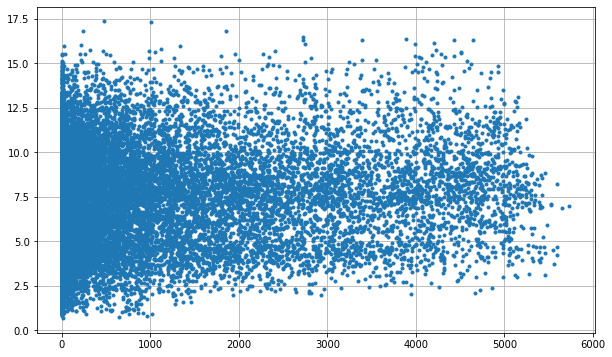

5733.42
date_forecast
2019-06-02 22:00:00    1.22825
2019-06-02 23:00:00    1.22350
2019-06-03 00:00:00    1.21975
2019-06-03 01:00:00    1.21800
2019-06-03 02:00:00    1.21800
                        ...   
2022-10-20 20:00:00    1.28050
2022-10-20 21:00:00    1.28400
2022-10-20 22:00:00    1.28700
2022-10-20 23:00:00    1.29050
2022-10-21 00:00:00    1.29200
Freq: H, Name: air_density_2m:kgm3, Length: 29667, dtype: float32
Column Name :  air_density_2m:kgm3


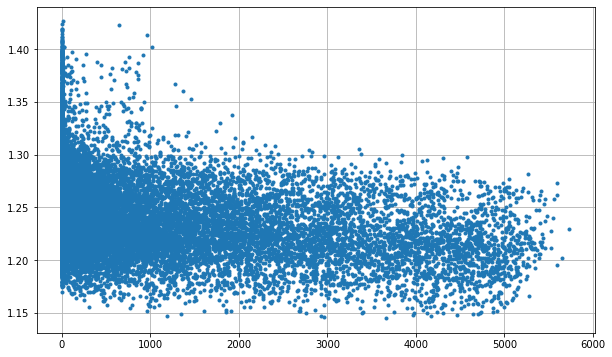

5733.42
date_forecast
2019-06-02 22:00:00    1728.949951
2019-06-02 23:00:00    1689.824951
2019-06-03 00:00:00    1563.224976
2019-06-03 01:00:00    1283.425049
2019-06-03 02:00:00    1003.500000
                          ...     
2022-10-20 20:00:00    1291.500000
2022-10-20 21:00:00            NaN
2022-10-20 22:00:00            NaN
2022-10-20 23:00:00            NaN
2022-10-21 00:00:00            NaN
Freq: H, Name: ceiling_height_agl:m, Length: 29667, dtype: float32
Column Name :  ceiling_height_agl:m


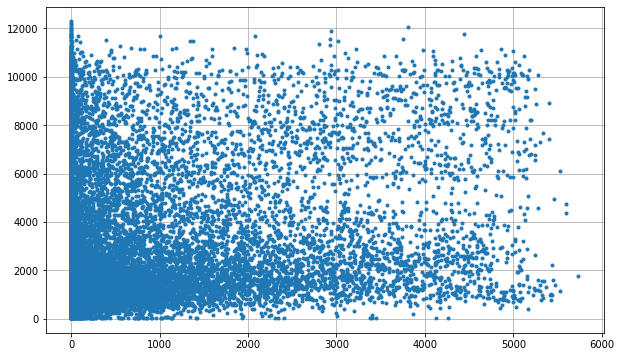

5733.42
date_forecast
2019-06-02 22:00:00        0.000000
2019-06-02 23:00:00        0.000000
2019-06-03 00:00:00        0.000000
2019-06-03 01:00:00      208.649994
2019-06-03 02:00:00    32468.150391
                           ...     
2022-10-20 20:00:00        0.000000
2022-10-20 21:00:00        0.000000
2022-10-20 22:00:00        0.000000
2022-10-20 23:00:00        0.000000
2022-10-21 00:00:00        0.000000
Freq: H, Name: clear_sky_energy_1h:J, Length: 29667, dtype: float32
Column Name :  clear_sky_energy_1h:J


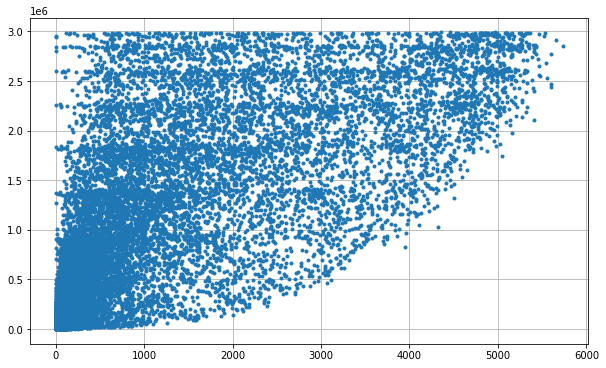

5733.42
date_forecast
2019-06-02 22:00:00     0.00
2019-06-02 23:00:00     0.00
2019-06-03 00:00:00     0.00
2019-06-03 01:00:00     0.75
2019-06-03 02:00:00    23.10
                       ...  
2022-10-20 20:00:00     0.00
2022-10-20 21:00:00     0.00
2022-10-20 22:00:00     0.00
2022-10-20 23:00:00     0.00
2022-10-21 00:00:00     0.00
Freq: H, Name: clear_sky_rad:W, Length: 29667, dtype: float32
Column Name :  clear_sky_rad:W


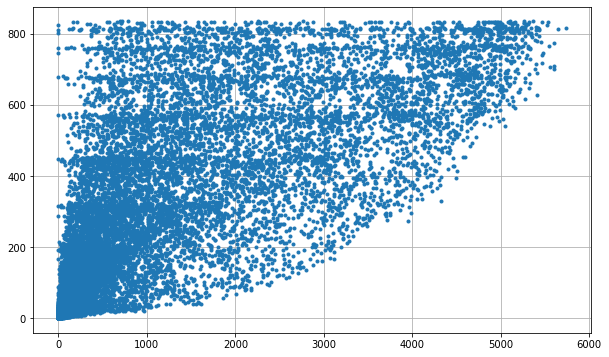

5733.42
date_forecast
2019-06-02 22:00:00    1728.949951
2019-06-02 23:00:00    1689.824951
2019-06-03 00:00:00    1563.224976
2019-06-03 01:00:00    1283.425049
2019-06-03 02:00:00    1003.500000
                          ...     
2022-10-20 20:00:00    1192.550049
2022-10-20 21:00:00     686.900024
2022-10-20 22:00:00     149.500000
2022-10-20 23:00:00            NaN
2022-10-21 00:00:00            NaN
Freq: H, Name: cloud_base_agl:m, Length: 29667, dtype: float32
Column Name :  cloud_base_agl:m


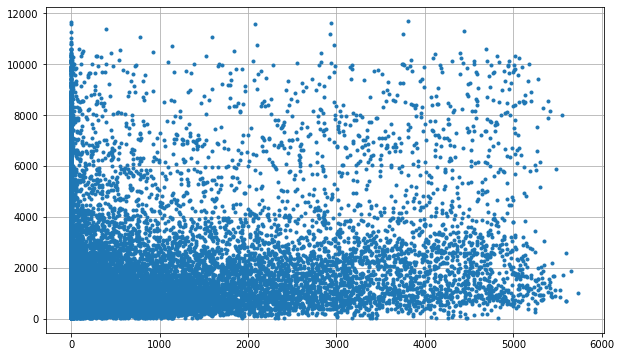

5733.42
date_forecast
2019-06-02 22:00:00    0.0
2019-06-02 23:00:00    0.0
2019-06-03 00:00:00    0.0
2019-06-03 01:00:00    0.0
2019-06-03 02:00:00    0.0
                      ... 
2022-10-20 20:00:00    0.0
2022-10-20 21:00:00    0.0
2022-10-20 22:00:00    0.0
2022-10-20 23:00:00    0.0
2022-10-21 00:00:00    0.0
Freq: H, Name: dew_or_rime:idx, Length: 29667, dtype: float32
Column Name :  dew_or_rime:idx


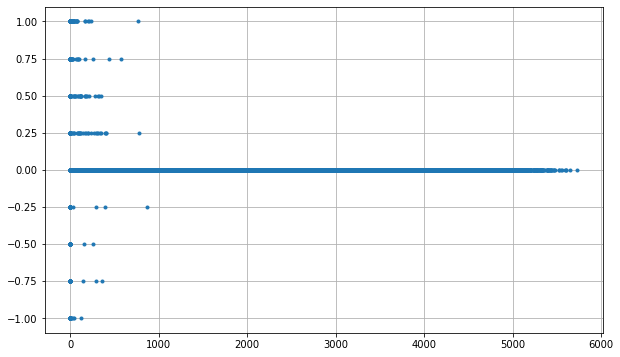

5733.42
date_forecast
2019-06-02 22:00:00    280.299988
2019-06-02 23:00:00    280.299988
2019-06-03 00:00:00    280.649994
2019-06-03 01:00:00    281.674988
2019-06-03 02:00:00    282.500000
                          ...    
2022-10-20 20:00:00    275.799988
2022-10-20 21:00:00    275.200012
2022-10-20 22:00:00    274.600006
2022-10-20 23:00:00    274.174988
2022-10-21 00:00:00    273.675018
Freq: H, Name: dew_point_2m:K, Length: 29667, dtype: float32
Column Name :  dew_point_2m:K


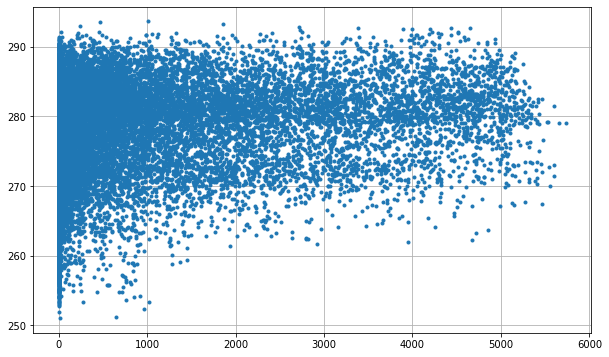

5733.42
date_forecast
2019-06-02 22:00:00     0.000
2019-06-02 23:00:00     0.000
2019-06-03 00:00:00     0.000
2019-06-03 01:00:00     0.300
2019-06-03 02:00:00    11.975
                        ...  
2022-10-20 20:00:00     0.000
2022-10-20 21:00:00     0.000
2022-10-20 22:00:00     0.000
2022-10-20 23:00:00     0.000
2022-10-21 00:00:00     0.000
Freq: H, Name: diffuse_rad:W, Length: 29667, dtype: float32
Column Name :  diffuse_rad:W


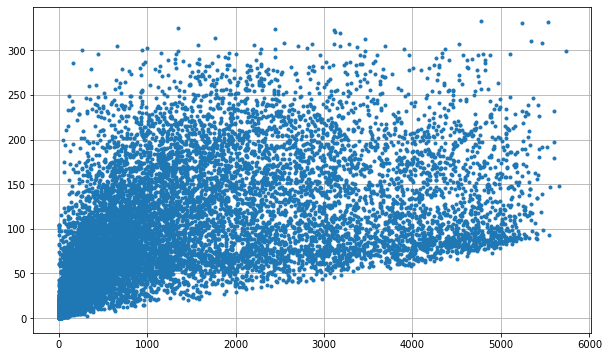

5733.42
date_forecast
2019-06-02 22:00:00        0.000000
2019-06-02 23:00:00        0.000000
2019-06-03 00:00:00        0.000000
2019-06-03 01:00:00      526.775024
2019-06-03 02:00:00    22068.949219
                           ...     
2022-10-20 20:00:00        0.000000
2022-10-20 21:00:00        0.000000
2022-10-20 22:00:00        0.000000
2022-10-20 23:00:00        0.000000
2022-10-21 00:00:00        0.000000
Freq: H, Name: diffuse_rad_1h:J, Length: 29667, dtype: float32
Column Name :  diffuse_rad_1h:J


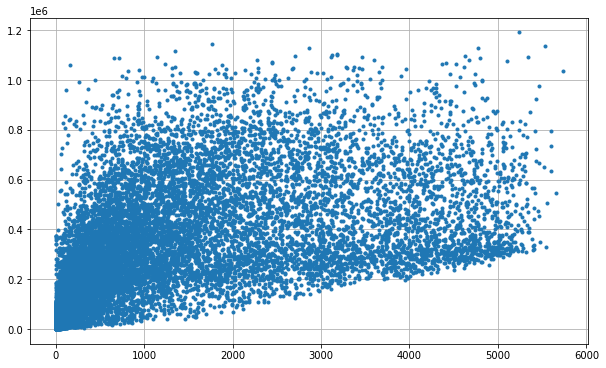

5733.42
date_forecast
2019-06-02 22:00:00    0.00
2019-06-02 23:00:00    0.00
2019-06-03 00:00:00    0.00
2019-06-03 01:00:00    0.00
2019-06-03 02:00:00    0.15
                       ... 
2022-10-20 20:00:00    0.00
2022-10-20 21:00:00    0.00
2022-10-20 22:00:00    0.00
2022-10-20 23:00:00    0.00
2022-10-21 00:00:00    0.00
Freq: H, Name: direct_rad:W, Length: 29667, dtype: float32
Column Name :  direct_rad:W


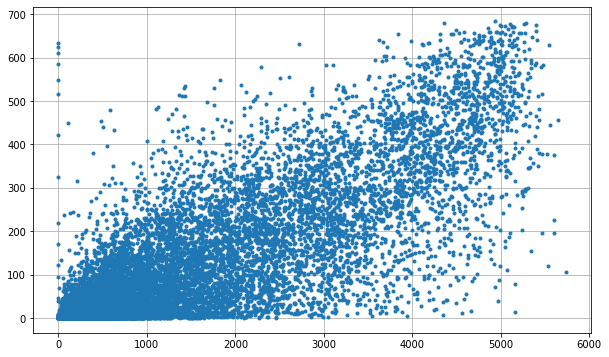

5733.42
date_forecast
2019-06-02 22:00:00      0.000000
2019-06-02 23:00:00      0.000000
2019-06-03 00:00:00      0.000000
2019-06-03 01:00:00      0.000000
2019-06-03 02:00:00    282.975006
                          ...    
2022-10-20 20:00:00      0.000000
2022-10-20 21:00:00      0.000000
2022-10-20 22:00:00      0.000000
2022-10-20 23:00:00      0.000000
2022-10-21 00:00:00      0.000000
Freq: H, Name: direct_rad_1h:J, Length: 29667, dtype: float32
Column Name :  direct_rad_1h:J


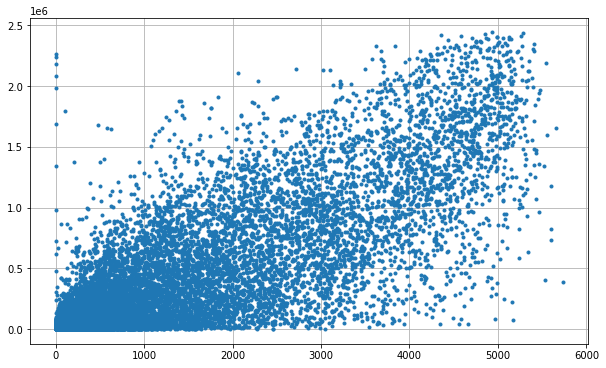

5733.42
date_forecast
2019-06-02 22:00:00     99.074997
2019-06-02 23:00:00     99.750000
2019-06-03 00:00:00    100.000000
2019-06-03 01:00:00    100.000000
2019-06-03 02:00:00     84.875000
                          ...    
2022-10-20 20:00:00     38.125000
2022-10-20 21:00:00     16.275000
2022-10-20 22:00:00      9.700000
2022-10-20 23:00:00      4.525000
2022-10-21 00:00:00      1.975000
Freq: H, Name: effective_cloud_cover:p, Length: 29667, dtype: float32
Column Name :  effective_cloud_cover:p


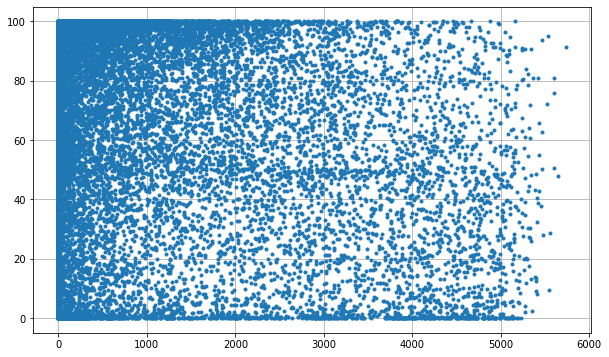

5733.42
date_forecast
2019-06-02 22:00:00    6.0
2019-06-02 23:00:00    6.0
2019-06-03 00:00:00    6.0
2019-06-03 01:00:00    6.0
2019-06-03 02:00:00    6.0
                      ... 
2022-10-20 20:00:00    6.0
2022-10-20 21:00:00    6.0
2022-10-20 22:00:00    6.0
2022-10-20 23:00:00    6.0
2022-10-21 00:00:00    6.0
Freq: H, Name: elevation:m, Length: 29667, dtype: float32
Column Name :  elevation:m


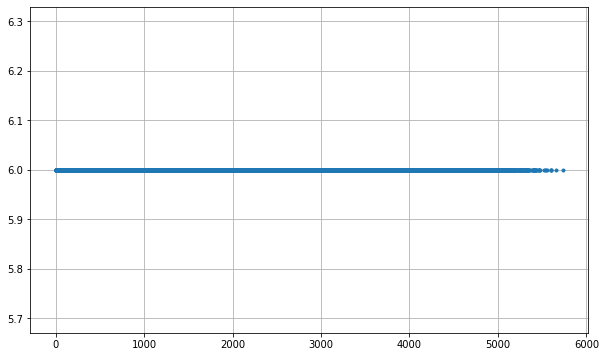

5733.42
date_forecast
2019-06-02 22:00:00    0.0
2019-06-02 23:00:00    0.0
2019-06-03 00:00:00    0.0
2019-06-03 01:00:00    0.0
2019-06-03 02:00:00    0.0
                      ... 
2022-10-20 20:00:00    0.0
2022-10-20 21:00:00    0.0
2022-10-20 22:00:00    0.0
2022-10-20 23:00:00    0.0
2022-10-21 00:00:00    0.0
Freq: H, Name: fresh_snow_12h:cm, Length: 29667, dtype: float32
Column Name :  fresh_snow_12h:cm


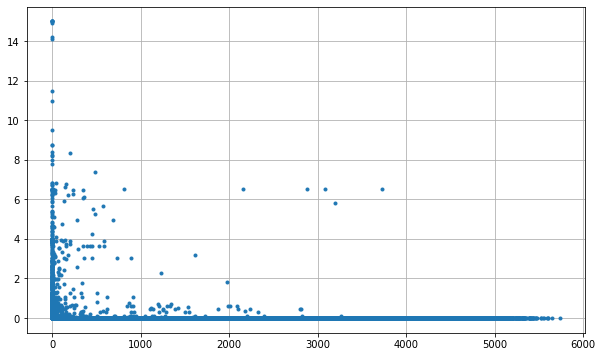

5733.42
date_forecast
2019-06-02 22:00:00    0.0
2019-06-02 23:00:00    0.0
2019-06-03 00:00:00    0.0
2019-06-03 01:00:00    0.0
2019-06-03 02:00:00    0.0
                      ... 
2022-10-20 20:00:00    0.0
2022-10-20 21:00:00    0.0
2022-10-20 22:00:00    0.0
2022-10-20 23:00:00    0.0
2022-10-21 00:00:00    0.0
Freq: H, Name: fresh_snow_1h:cm, Length: 29667, dtype: float32
Column Name :  fresh_snow_1h:cm


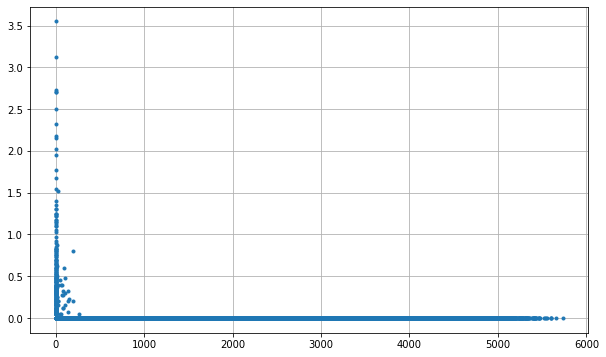

5733.42
date_forecast
2019-06-02 22:00:00    0.0
2019-06-02 23:00:00    0.0
2019-06-03 00:00:00    0.0
2019-06-03 01:00:00    0.0
2019-06-03 02:00:00    0.0
                      ... 
2022-10-20 20:00:00    0.0
2022-10-20 21:00:00    0.0
2022-10-20 22:00:00    0.0
2022-10-20 23:00:00    0.0
2022-10-21 00:00:00    0.0
Freq: H, Name: fresh_snow_24h:cm, Length: 29667, dtype: float32
Column Name :  fresh_snow_24h:cm


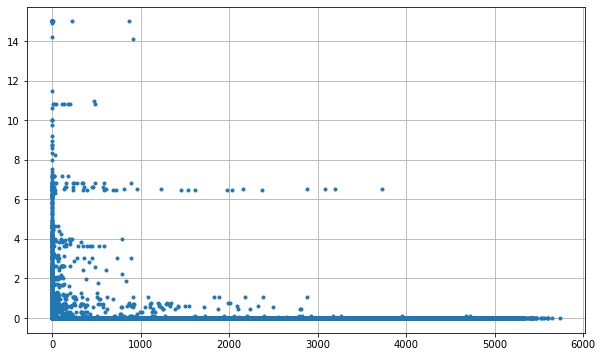

5733.42
date_forecast
2019-06-02 22:00:00    0.0
2019-06-02 23:00:00    0.0
2019-06-03 00:00:00    0.0
2019-06-03 01:00:00    0.0
2019-06-03 02:00:00    0.0
                      ... 
2022-10-20 20:00:00    0.0
2022-10-20 21:00:00    0.0
2022-10-20 22:00:00    0.0
2022-10-20 23:00:00    0.0
2022-10-21 00:00:00    0.0
Freq: H, Name: fresh_snow_3h:cm, Length: 29667, dtype: float32
Column Name :  fresh_snow_3h:cm


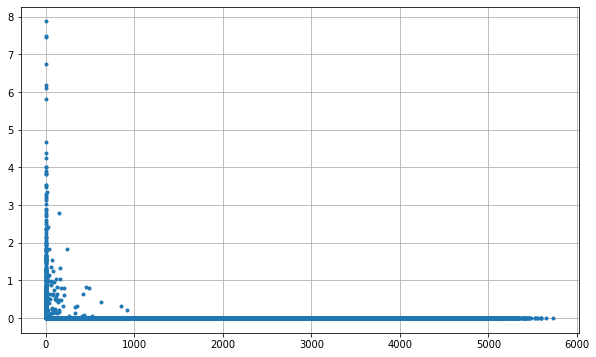

5733.42
date_forecast
2019-06-02 22:00:00    0.0
2019-06-02 23:00:00    0.0
2019-06-03 00:00:00    0.0
2019-06-03 01:00:00    0.0
2019-06-03 02:00:00    0.0
                      ... 
2022-10-20 20:00:00    0.0
2022-10-20 21:00:00    0.0
2022-10-20 22:00:00    0.0
2022-10-20 23:00:00    0.0
2022-10-21 00:00:00    0.0
Freq: H, Name: fresh_snow_6h:cm, Length: 29667, dtype: float32
Column Name :  fresh_snow_6h:cm


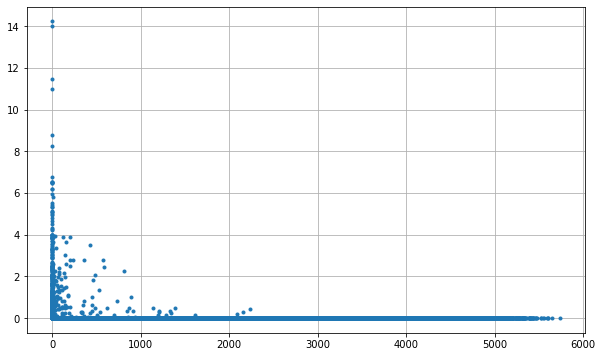

5733.42
date_forecast
2019-06-02 22:00:00    0.00
2019-06-02 23:00:00    0.00
2019-06-03 00:00:00    0.00
2019-06-03 01:00:00    0.25
2019-06-03 02:00:00    1.00
                       ... 
2022-10-20 20:00:00    0.00
2022-10-20 21:00:00    0.00
2022-10-20 22:00:00    0.00
2022-10-20 23:00:00    0.00
2022-10-21 00:00:00    0.00
Freq: H, Name: is_day:idx, Length: 29667, dtype: float32
Column Name :  is_day:idx


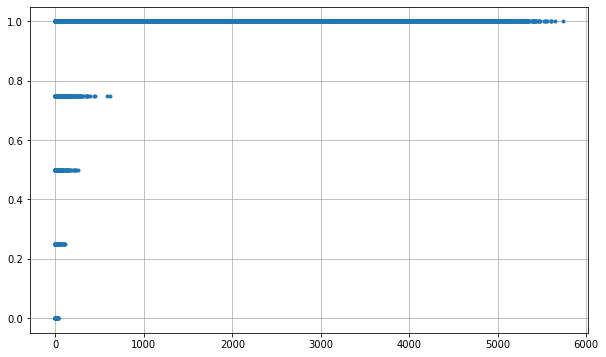

5733.42
date_forecast
2019-06-02 22:00:00    1.0
2019-06-02 23:00:00    1.0
2019-06-03 00:00:00    1.0
2019-06-03 01:00:00    1.0
2019-06-03 02:00:00    0.0
                      ... 
2022-10-20 20:00:00    1.0
2022-10-20 21:00:00    1.0
2022-10-20 22:00:00    1.0
2022-10-20 23:00:00    1.0
2022-10-21 00:00:00    1.0
Freq: H, Name: is_in_shadow:idx, Length: 29667, dtype: float32
Column Name :  is_in_shadow:idx


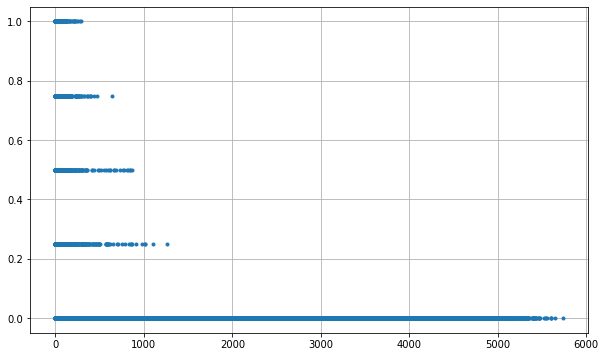

5733.42
date_forecast
2019-06-02 22:00:00    1006.299988
2019-06-02 23:00:00    1005.200012
2019-06-03 00:00:00    1004.525024
2019-06-03 01:00:00    1004.025024
2019-06-03 02:00:00    1003.099976
                          ...     
2022-10-20 20:00:00    1019.500000
2022-10-20 21:00:00    1019.250000
2022-10-20 22:00:00    1018.974976
2022-10-20 23:00:00    1018.650024
2022-10-21 00:00:00    1018.224976
Freq: H, Name: msl_pressure:hPa, Length: 29667, dtype: float32
Column Name :  msl_pressure:hPa


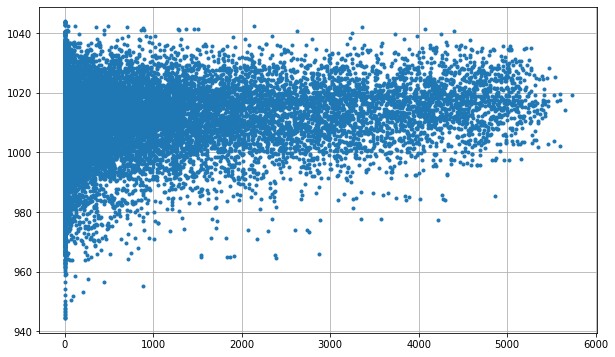

5733.42
date_forecast
2019-06-02 22:00:00    0.0
2019-06-02 23:00:00    0.0
2019-06-03 00:00:00    0.0
2019-06-03 01:00:00    0.0
2019-06-03 02:00:00    0.0
                      ... 
2022-10-20 20:00:00    0.0
2022-10-20 21:00:00    0.0
2022-10-20 22:00:00    0.0
2022-10-20 23:00:00    0.0
2022-10-21 00:00:00    0.0
Freq: H, Name: precip_5min:mm, Length: 29667, dtype: float32
Column Name :  precip_5min:mm


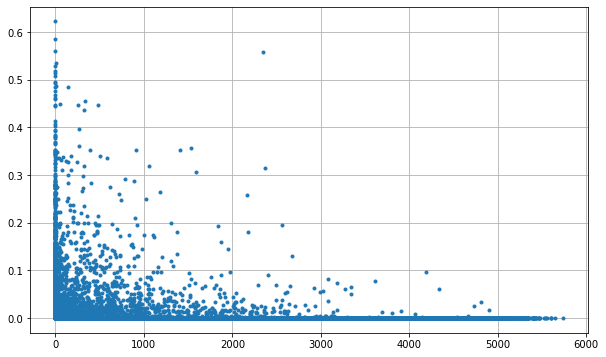

5733.42
date_forecast
2019-06-02 22:00:00    0.0
2019-06-02 23:00:00    0.0
2019-06-03 00:00:00    0.0
2019-06-03 01:00:00    0.0
2019-06-03 02:00:00    0.0
                      ... 
2022-10-20 20:00:00    0.0
2022-10-20 21:00:00    0.0
2022-10-20 22:00:00    0.0
2022-10-20 23:00:00    0.0
2022-10-21 00:00:00    0.0
Freq: H, Name: precip_type_5min:idx, Length: 29667, dtype: float32
Column Name :  precip_type_5min:idx


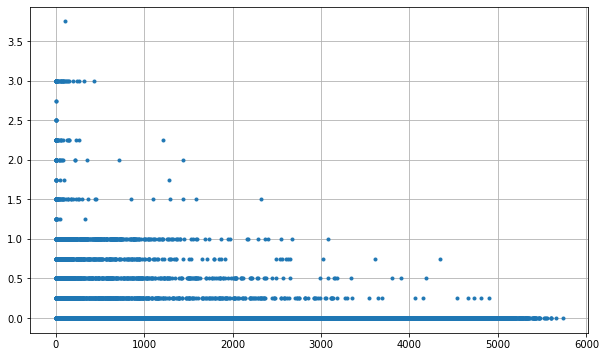

5733.42
date_forecast
2019-06-02 22:00:00     993.750000
2019-06-02 23:00:00     992.674988
2019-06-03 00:00:00     992.000000
2019-06-03 01:00:00     991.500000
2019-06-03 02:00:00     990.550049
                          ...     
2022-10-20 20:00:00    1006.599976
2022-10-20 21:00:00    1006.375000
2022-10-20 22:00:00    1006.099976
2022-10-20 23:00:00    1005.775024
2022-10-21 00:00:00    1005.325012
Freq: H, Name: pressure_100m:hPa, Length: 29667, dtype: float32
Column Name :  pressure_100m:hPa


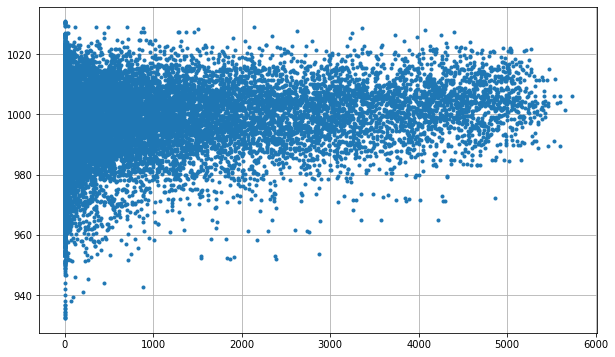

5733.42
date_forecast
2019-06-02 22:00:00     999.775024
2019-06-02 23:00:00     998.650024
2019-06-03 00:00:00     997.974976
2019-06-03 01:00:00     997.449951
2019-06-03 02:00:00     996.500000
                          ...     
2022-10-20 20:00:00    1012.849976
2022-10-20 21:00:00    1012.625000
2022-10-20 22:00:00    1012.349976
2022-10-20 23:00:00    1012.049988
2022-10-21 00:00:00    1011.625000
Freq: H, Name: pressure_50m:hPa, Length: 29667, dtype: float32
Column Name :  pressure_50m:hPa


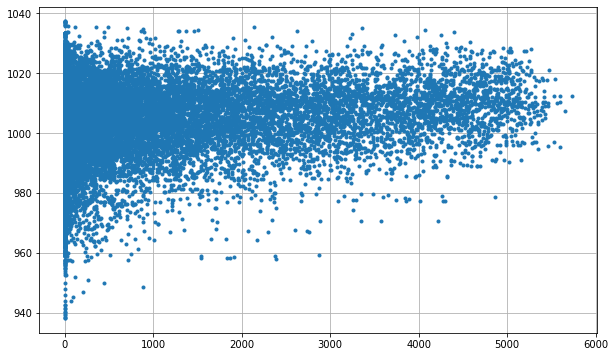

5733.42
date_forecast
2019-06-02 22:00:00    0.0
2019-06-02 23:00:00    0.0
2019-06-03 00:00:00    0.0
2019-06-03 01:00:00    0.0
2019-06-03 02:00:00    0.0
                      ... 
2022-10-20 20:00:00    0.0
2022-10-20 21:00:00    0.0
2022-10-20 22:00:00    0.0
2022-10-20 23:00:00    0.0
2022-10-21 00:00:00    0.0
Freq: H, Name: prob_rime:p, Length: 29667, dtype: float32
Column Name :  prob_rime:p


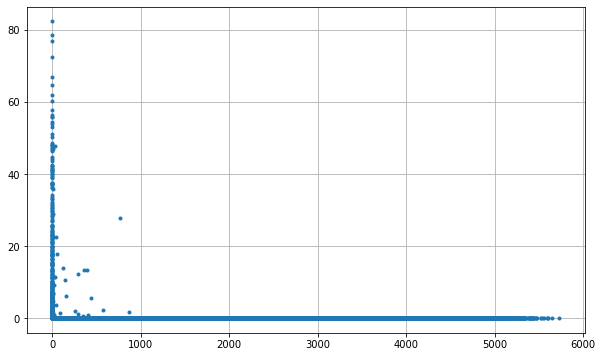

5733.42
date_forecast
2019-06-02 22:00:00    0.000
2019-06-02 23:00:00    0.025
2019-06-03 00:00:00    0.100
2019-06-03 01:00:00    0.125
2019-06-03 02:00:00    0.100
                       ...  
2022-10-20 20:00:00    0.000
2022-10-20 21:00:00    0.000
2022-10-20 22:00:00    0.000
2022-10-20 23:00:00    0.000
2022-10-21 00:00:00    0.000
Freq: H, Name: rain_water:kgm2, Length: 29667, dtype: float32
Column Name :  rain_water:kgm2


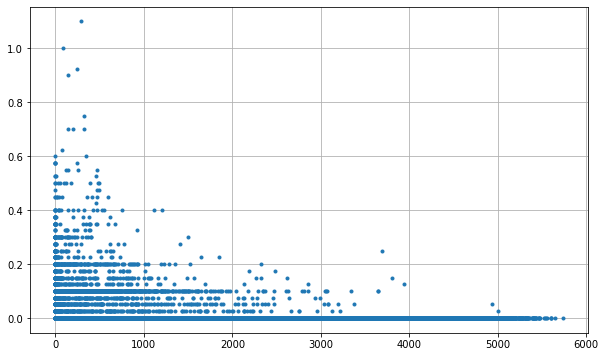

5733.42
date_forecast
2019-06-02 22:00:00    71.674995
2019-06-02 23:00:00    68.000000
2019-06-03 00:00:00    67.949997
2019-06-03 01:00:00    73.875000
2019-06-03 02:00:00    79.925003
                         ...    
2022-10-20 20:00:00    78.649994
2022-10-20 21:00:00    79.125000
2022-10-20 22:00:00    79.974998
2022-10-20 23:00:00    81.199997
2022-10-21 00:00:00    83.250000
Freq: H, Name: relative_humidity_1000hPa:p, Length: 29667, dtype: float32
Column Name :  relative_humidity_1000hPa:p


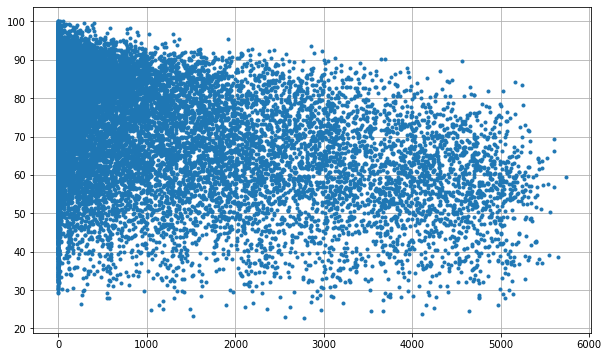

5733.42
date_forecast
2019-06-02 22:00:00    1005.799988
2019-06-02 23:00:00    1004.650024
2019-06-03 00:00:00    1003.950012
2019-06-03 01:00:00    1003.449951
2019-06-03 02:00:00    1002.500000
                          ...     
2022-10-20 20:00:00    1019.125000
2022-10-20 21:00:00    1018.900024
2022-10-20 22:00:00    1018.650024
2022-10-20 23:00:00    1018.349976
2022-10-21 00:00:00    1017.924988
Freq: H, Name: sfc_pressure:hPa, Length: 29667, dtype: float32
Column Name :  sfc_pressure:hPa


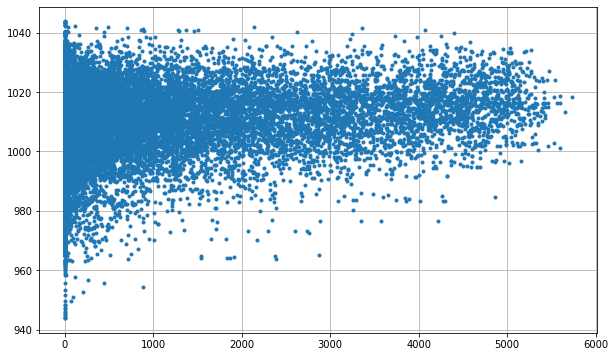

5733.42
date_forecast
2019-06-02 22:00:00   NaN
2019-06-02 23:00:00   NaN
2019-06-03 00:00:00   NaN
2019-06-03 01:00:00   NaN
2019-06-03 02:00:00   NaN
                       ..
2022-10-20 20:00:00   NaN
2022-10-20 21:00:00   NaN
2022-10-20 22:00:00   NaN
2022-10-20 23:00:00   NaN
2022-10-21 00:00:00   NaN
Freq: H, Name: snow_density:kgm3, Length: 29667, dtype: float32
Column Name :  snow_density:kgm3


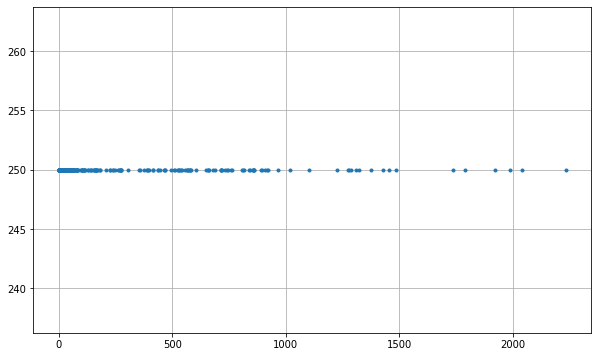

5733.42
date_forecast
2019-06-02 22:00:00    0.0
2019-06-02 23:00:00    0.0
2019-06-03 00:00:00    0.0
2019-06-03 01:00:00    0.0
2019-06-03 02:00:00    0.0
                      ... 
2022-10-20 20:00:00    0.0
2022-10-20 21:00:00    0.0
2022-10-20 22:00:00    0.0
2022-10-20 23:00:00    0.0
2022-10-21 00:00:00    0.0
Freq: H, Name: snow_depth:cm, Length: 29667, dtype: float32
Column Name :  snow_depth:cm


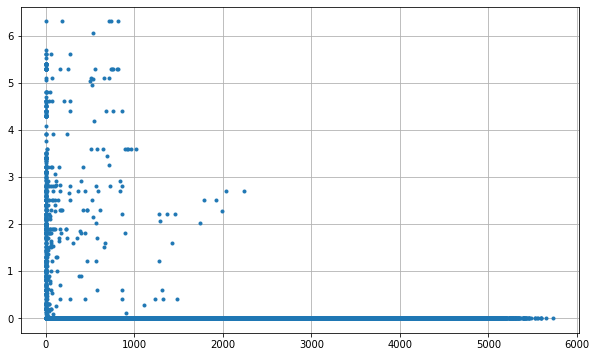

5733.42
date_forecast
2019-06-02 22:00:00    0.0
2019-06-02 23:00:00    0.0
2019-06-03 00:00:00    0.0
2019-06-03 01:00:00    0.0
2019-06-03 02:00:00    0.0
                      ... 
2022-10-20 20:00:00    0.0
2022-10-20 21:00:00    0.0
2022-10-20 22:00:00    0.0
2022-10-20 23:00:00    0.0
2022-10-21 00:00:00    0.0
Freq: H, Name: snow_drift:idx, Length: 29667, dtype: float32
Column Name :  snow_drift:idx


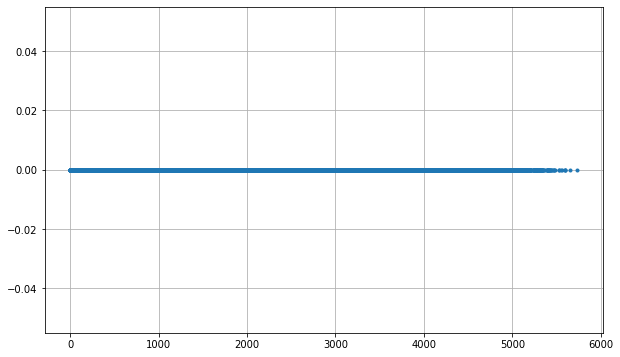

5733.42
date_forecast
2019-06-02 22:00:00    0.0
2019-06-02 23:00:00    0.0
2019-06-03 00:00:00    0.0
2019-06-03 01:00:00    0.0
2019-06-03 02:00:00    0.0
                      ... 
2022-10-20 20:00:00    0.0
2022-10-20 21:00:00    0.0
2022-10-20 22:00:00    0.0
2022-10-20 23:00:00    0.0
2022-10-21 00:00:00    0.0
Freq: H, Name: snow_melt_10min:mm, Length: 29667, dtype: float32
Column Name :  snow_melt_10min:mm


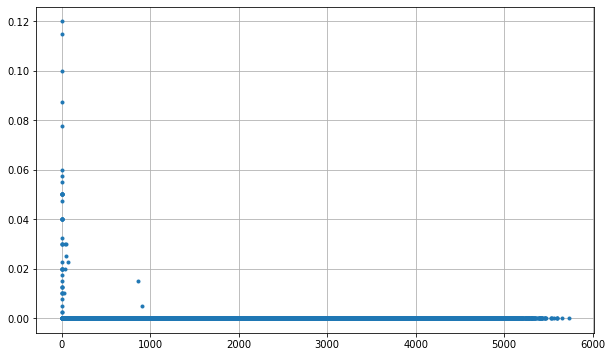

5733.42
date_forecast
2019-06-02 22:00:00    0.175
2019-06-02 23:00:00    0.200
2019-06-03 00:00:00    0.400
2019-06-03 01:00:00    0.550
2019-06-03 02:00:00    0.250
                       ...  
2022-10-20 20:00:00    0.000
2022-10-20 21:00:00    0.000
2022-10-20 22:00:00    0.000
2022-10-20 23:00:00    0.000
2022-10-21 00:00:00    0.000
Freq: H, Name: snow_water:kgm2, Length: 29667, dtype: float32
Column Name :  snow_water:kgm2


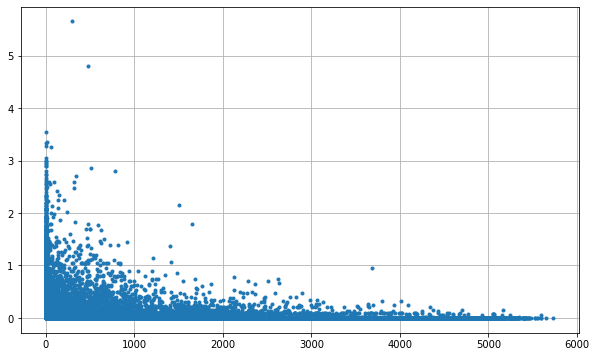

5733.42
date_forecast
2019-06-02 22:00:00    348.036743
2019-06-02 23:00:00     91.980751
2019-06-03 00:00:00     14.934750
2019-06-03 01:00:00     28.630251
2019-06-03 02:00:00     41.997501
                          ...    
2022-10-20 20:00:00    313.254761
2022-10-20 21:00:00    329.987762
2022-10-20 22:00:00    347.845490
2022-10-20 23:00:00     96.250496
2022-10-21 00:00:00     23.331749
Freq: H, Name: sun_azimuth:d, Length: 29667, dtype: float32
Column Name :  sun_azimuth:d


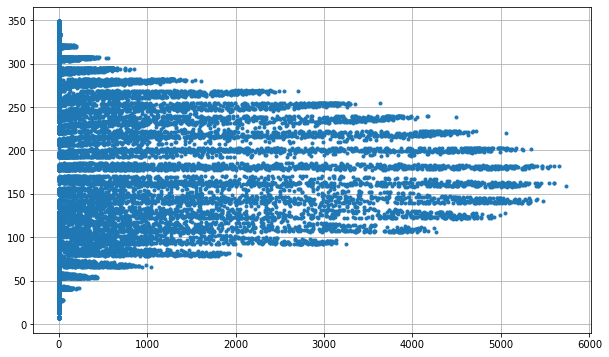

5733.42
date_forecast
2019-06-02 22:00:00    -3.774250
2019-06-02 23:00:00    -4.357250
2019-06-03 00:00:00    -3.309500
2019-06-03 01:00:00    -0.822500
2019-06-03 02:00:00     3.051250
                         ...    
2022-10-20 20:00:00   -29.704250
2022-10-20 21:00:00   -33.860748
2022-10-20 22:00:00   -36.270000
2022-10-20 23:00:00   -36.614998
2022-10-21 00:00:00   -35.368500
Freq: H, Name: sun_elevation:d, Length: 29667, dtype: float32
Column Name :  sun_elevation:d


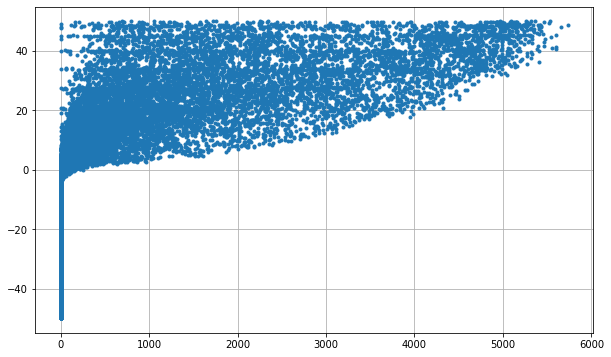

5733.42
date_forecast
2019-06-02 22:00:00    0.0
2019-06-02 23:00:00    0.0
2019-06-03 00:00:00    0.0
2019-06-03 01:00:00    0.0
2019-06-03 02:00:00    0.0
                      ... 
2022-10-20 20:00:00    0.0
2022-10-20 21:00:00    0.0
2022-10-20 22:00:00    0.0
2022-10-20 23:00:00    0.0
2022-10-21 00:00:00    0.0
Freq: H, Name: super_cooled_liquid_water:kgm2, Length: 29667, dtype: float32
Column Name :  super_cooled_liquid_water:kgm2


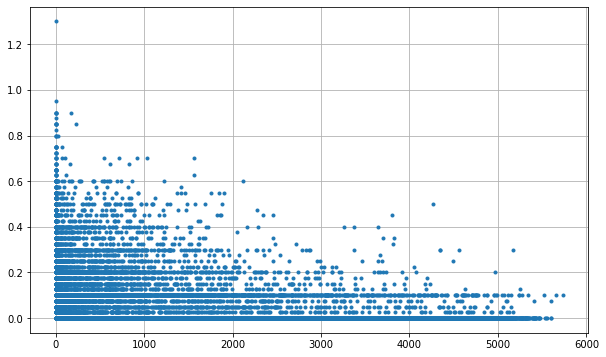

5733.42
date_forecast
2019-06-02 22:00:00    286.225006
2019-06-02 23:00:00    286.899994
2019-06-03 00:00:00    286.950012
2019-06-03 01:00:00    286.750000
2019-06-03 02:00:00    286.450012
                          ...    
2022-10-20 20:00:00    278.250000
2022-10-20 21:00:00    277.850006
2022-10-20 22:00:00    277.475006
2022-10-20 23:00:00    277.149994
2022-10-21 00:00:00    276.700012
Freq: H, Name: t_1000hPa:K, Length: 29667, dtype: float32
Column Name :  t_1000hPa:K


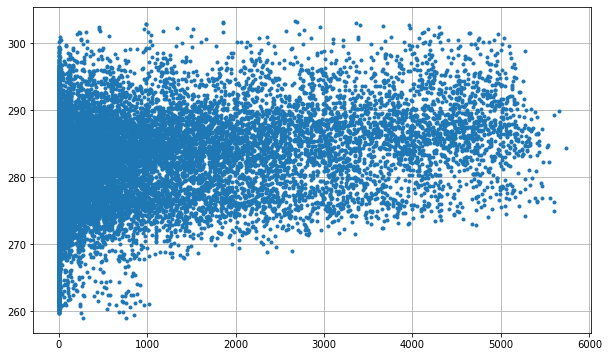

5733.42
date_forecast
2019-06-02 22:00:00    100.000000
2019-06-02 23:00:00    100.000000
2019-06-03 00:00:00    100.000000
2019-06-03 01:00:00    100.000000
2019-06-03 02:00:00     99.224998
                          ...    
2022-10-20 20:00:00     47.050003
2022-10-20 21:00:00     19.500000
2022-10-20 22:00:00      9.700000
2022-10-20 23:00:00      4.525000
2022-10-21 00:00:00      1.975000
Freq: H, Name: total_cloud_cover:p, Length: 29667, dtype: float32
Column Name :  total_cloud_cover:p


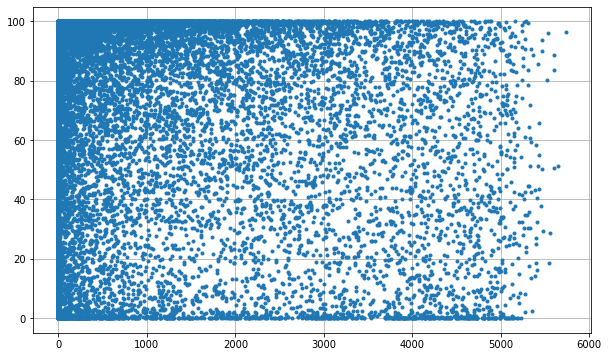

5733.42
date_forecast
2019-06-02 22:00:00    40386.476562
2019-06-02 23:00:00    33770.648438
2019-06-03 00:00:00    13595.500000
2019-06-03 01:00:00     2321.850098
2019-06-03 02:00:00    11634.799805
                           ...     
2022-10-20 20:00:00    40105.472656
2022-10-20 21:00:00    39001.398438
2022-10-20 22:00:00    35336.726562
2022-10-20 23:00:00    27164.625000
2022-10-21 00:00:00    29933.000000
Freq: H, Name: visibility:m, Length: 29667, dtype: float32
Column Name :  visibility:m


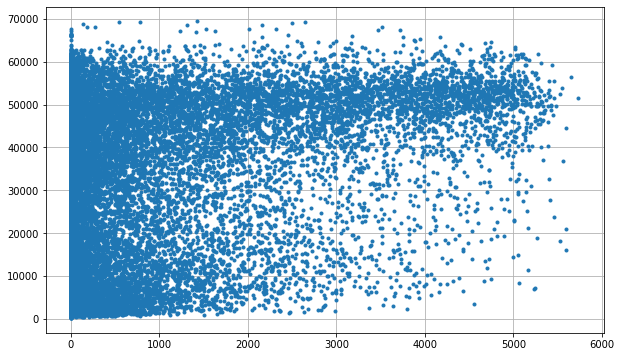

5733.42
date_forecast
2019-06-02 22:00:00    3.600
2019-06-02 23:00:00    3.350
2019-06-03 00:00:00    3.050
2019-06-03 01:00:00    2.725
2019-06-03 02:00:00    2.550
                       ...  
2022-10-20 20:00:00    1.925
2022-10-20 21:00:00    1.675
2022-10-20 22:00:00    1.400
2022-10-20 23:00:00    1.300
2022-10-21 00:00:00    1.400
Freq: H, Name: wind_speed_10m:ms, Length: 29667, dtype: float32
Column Name :  wind_speed_10m:ms


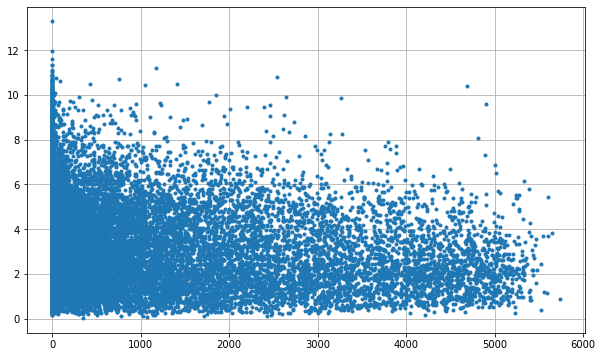

5733.42
date_forecast
2019-06-02 22:00:00   -3.575
2019-06-02 23:00:00   -3.350
2019-06-03 00:00:00   -2.950
2019-06-03 01:00:00   -2.600
2019-06-03 02:00:00   -2.350
                       ...  
2022-10-20 20:00:00    0.475
2022-10-20 21:00:00    0.250
2022-10-20 22:00:00    0.050
2022-10-20 23:00:00   -0.175
2022-10-21 00:00:00   -0.700
Freq: H, Name: wind_speed_u_10m:ms, Length: 29667, dtype: float32
Column Name :  wind_speed_u_10m:ms


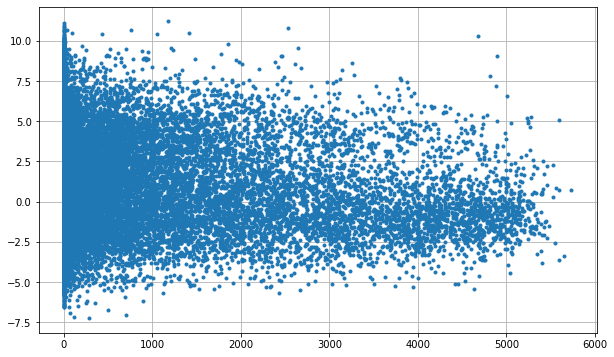

5733.42
date_forecast
2019-06-02 22:00:00   -0.500
2019-06-02 23:00:00    0.275
2019-06-03 00:00:00    0.750
2019-06-03 01:00:00    0.875
2019-06-03 02:00:00    0.925
                       ...  
2022-10-20 20:00:00    1.850
2022-10-20 21:00:00    1.675
2022-10-20 22:00:00    1.400
2022-10-20 23:00:00    1.300
2022-10-21 00:00:00    1.175
Freq: H, Name: wind_speed_v_10m:ms, Length: 29667, dtype: float32
Column Name :  wind_speed_v_10m:ms


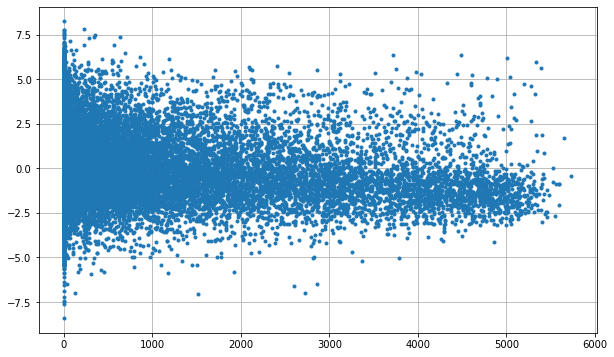

5733.42
date_forecast
2019-06-02 22:00:00    0.0
2019-06-02 23:00:00    0.0
2019-06-03 00:00:00    0.0
2019-06-03 01:00:00    0.0
2019-06-03 02:00:00    0.0
                      ... 
2022-10-20 20:00:00    0.0
2022-10-20 21:00:00    0.0
2022-10-20 22:00:00    0.0
2022-10-20 23:00:00    0.0
2022-10-21 00:00:00    0.0
Freq: H, Name: wind_speed_w_1000hPa:ms, Length: 29667, dtype: float32
Column Name :  wind_speed_w_1000hPa:ms


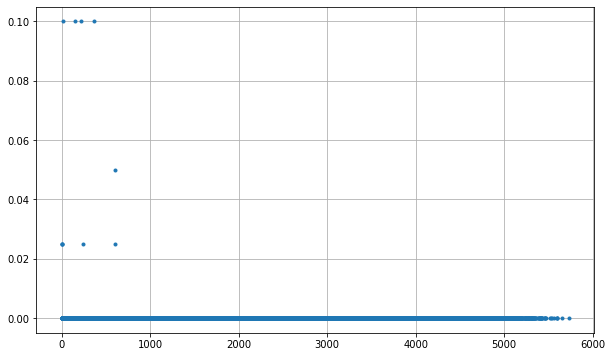

nan
date_forecast
2019-01-01 00:00:00    5.525
2019-01-01 01:00:00    5.425
2019-01-01 02:00:00    5.400
2019-01-01 03:00:00    5.350
2019-01-01 04:00:00    5.675
                       ...  
2022-05-02 10:00:00    5.250
2022-05-02 11:00:00    5.425
2022-05-02 12:00:00    5.525
2022-05-02 13:00:00    5.675
2022-05-02 14:00:00    5.225
Freq: H, Name: absolute_humidity_2m:gm3, Length: 29223, dtype: float32
Column Name :  absolute_humidity_2m:gm3


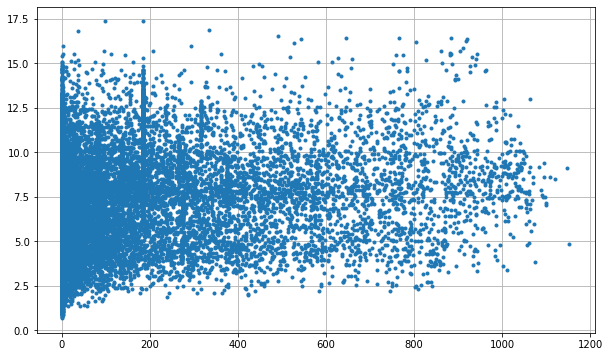

nan
date_forecast
2019-01-01 00:00:00    1.23975
2019-01-01 01:00:00    1.23975
2019-01-01 02:00:00    1.23850
2019-01-01 03:00:00    1.23975
2019-01-01 04:00:00    1.23750
                        ...   
2022-05-02 10:00:00    1.24900
2022-05-02 11:00:00    1.25000
2022-05-02 12:00:00    1.25000
2022-05-02 13:00:00    1.25225
2022-05-02 14:00:00    1.25300
Freq: H, Name: air_density_2m:kgm3, Length: 29223, dtype: float32
Column Name :  air_density_2m:kgm3


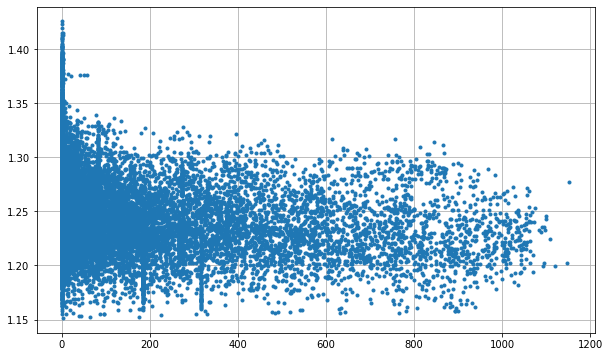

nan
date_forecast
2019-01-01 00:00:00    1200.675049
2019-01-01 01:00:00    1131.424927
2019-01-01 02:00:00    1061.000000
2019-01-01 03:00:00    1021.150024
2019-01-01 04:00:00    1033.699951
                          ...     
2022-05-02 10:00:00    2154.574951
2022-05-02 11:00:00    4463.500000
2022-05-02 12:00:00     976.599915
2022-05-02 13:00:00    2251.274902
2022-05-02 14:00:00    4375.700195
Freq: H, Name: ceiling_height_agl:m, Length: 29223, dtype: float32
Column Name :  ceiling_height_agl:m


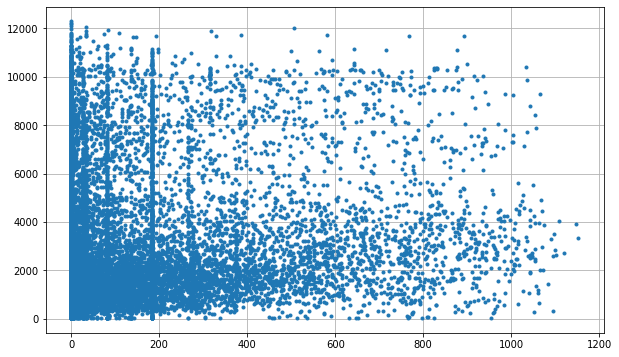

nan
date_forecast
2019-01-01 00:00:00          0.00
2019-01-01 01:00:00          0.00
2019-01-01 02:00:00          0.00
2019-01-01 03:00:00          0.00
2019-01-01 04:00:00          0.00
                          ...    
2022-05-02 10:00:00    2455953.50
2022-05-02 11:00:00    2578569.25
2022-05-02 12:00:00    2564026.25
2022-05-02 13:00:00    2413443.50
2022-05-02 14:00:00    2138473.00
Freq: H, Name: clear_sky_energy_1h:J, Length: 29223, dtype: float32
Column Name :  clear_sky_energy_1h:J


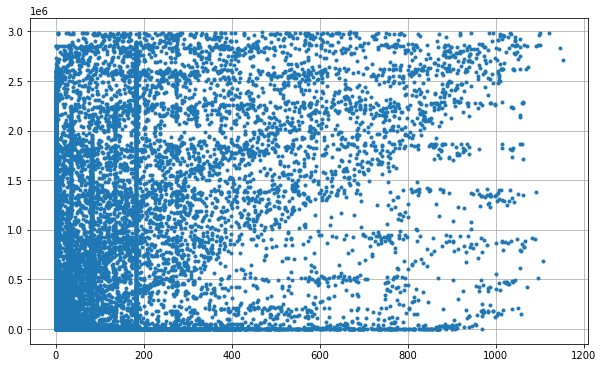

nan
date_forecast
2019-01-01 00:00:00      0.000000
2019-01-01 01:00:00      0.000000
2019-01-01 02:00:00      0.000000
2019-01-01 03:00:00      0.000000
2019-01-01 04:00:00      0.000000
                          ...    
2022-05-02 10:00:00    705.450012
2022-05-02 11:00:00    720.675049
2022-05-02 12:00:00    697.450012
2022-05-02 13:00:00    637.550049
2022-05-02 14:00:00    545.700012
Freq: H, Name: clear_sky_rad:W, Length: 29223, dtype: float32
Column Name :  clear_sky_rad:W


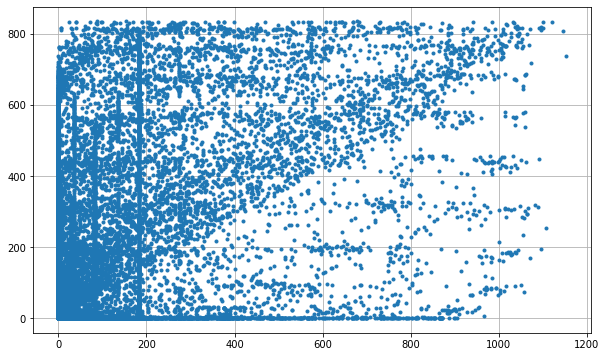

nan
date_forecast
2019-01-01 00:00:00    1200.675049
2019-01-01 01:00:00    1131.424927
2019-01-01 02:00:00    1061.000000
2019-01-01 03:00:00    1021.150024
2019-01-01 04:00:00    1033.699951
                          ...     
2022-05-02 10:00:00     648.750000
2022-05-02 11:00:00     797.525024
2022-05-02 12:00:00     731.724976
2022-05-02 13:00:00     591.400024
2022-05-02 14:00:00     809.799988
Freq: H, Name: cloud_base_agl:m, Length: 29223, dtype: float32
Column Name :  cloud_base_agl:m


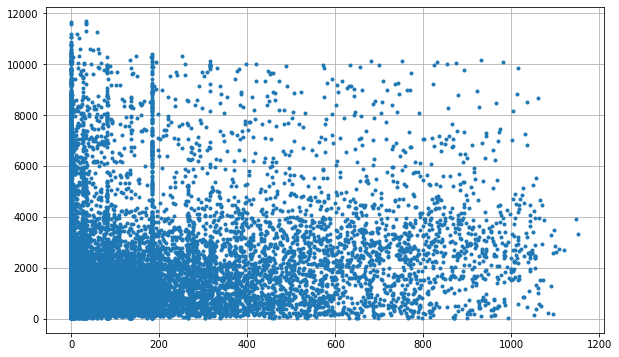

nan
date_forecast
2019-01-01 00:00:00    0.0
2019-01-01 01:00:00    0.0
2019-01-01 02:00:00    0.0
2019-01-01 03:00:00    0.0
2019-01-01 04:00:00    0.0
                      ... 
2022-05-02 10:00:00    0.0
2022-05-02 11:00:00    0.0
2022-05-02 12:00:00    0.0
2022-05-02 13:00:00    0.0
2022-05-02 14:00:00    0.0
Freq: H, Name: dew_or_rime:idx, Length: 29223, dtype: float32
Column Name :  dew_or_rime:idx


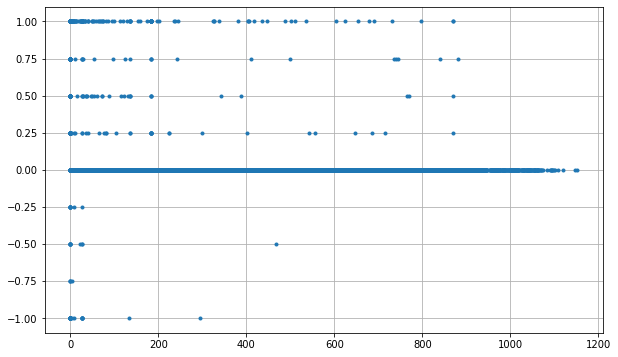

nan
date_forecast
2019-01-01 00:00:00    275.149994
2019-01-01 01:00:00    274.825012
2019-01-01 02:00:00    274.799988
2019-01-01 03:00:00    274.674988
2019-01-01 04:00:00    275.500000
                          ...    
2022-05-02 10:00:00    274.475006
2022-05-02 11:00:00    275.024994
2022-05-02 12:00:00    275.274994
2022-05-02 13:00:00    275.700012
2022-05-02 14:00:00    274.500000
Freq: H, Name: dew_point_2m:K, Length: 29223, dtype: float32
Column Name :  dew_point_2m:K


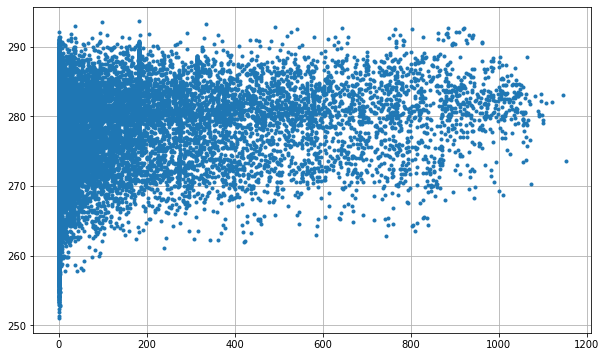

nan
date_forecast
2019-01-01 00:00:00      0.000000
2019-01-01 01:00:00      0.000000
2019-01-01 02:00:00      0.000000
2019-01-01 03:00:00      0.000000
2019-01-01 04:00:00      0.000000
                          ...    
2022-05-02 10:00:00    205.600006
2022-05-02 11:00:00    214.500000
2022-05-02 12:00:00    202.675003
2022-05-02 13:00:00    193.725006
2022-05-02 14:00:00    153.475006
Freq: H, Name: diffuse_rad:W, Length: 29223, dtype: float32
Column Name :  diffuse_rad:W


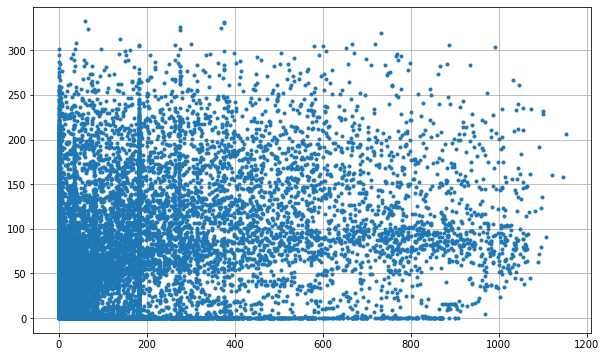

nan
date_forecast
2019-01-01 00:00:00         0.0000
2019-01-01 01:00:00         0.0000
2019-01-01 02:00:00         0.0000
2019-01-01 03:00:00         0.0000
2019-01-01 04:00:00         0.0000
                          ...     
2022-05-02 10:00:00    769033.5000
2022-05-02 11:00:00    756158.8750
2022-05-02 12:00:00    750922.8125
2022-05-02 13:00:00    713523.4375
2022-05-02 14:00:00    625004.3750
Freq: H, Name: diffuse_rad_1h:J, Length: 29223, dtype: float32
Column Name :  diffuse_rad_1h:J


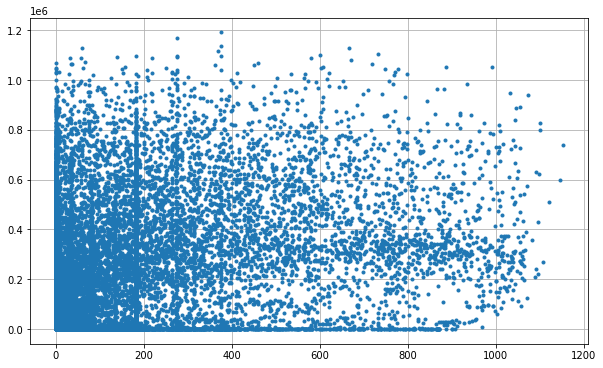

nan
date_forecast
2019-01-01 00:00:00      0.000000
2019-01-01 01:00:00      0.000000
2019-01-01 02:00:00      0.000000
2019-01-01 03:00:00      0.000000
2019-01-01 04:00:00      0.000000
                          ...    
2022-05-02 10:00:00    168.000000
2022-05-02 11:00:00    312.549988
2022-05-02 12:00:00    277.674988
2022-05-02 13:00:00    218.050003
2022-05-02 14:00:00    265.250000
Freq: H, Name: direct_rad:W, Length: 29223, dtype: float32
Column Name :  direct_rad:W


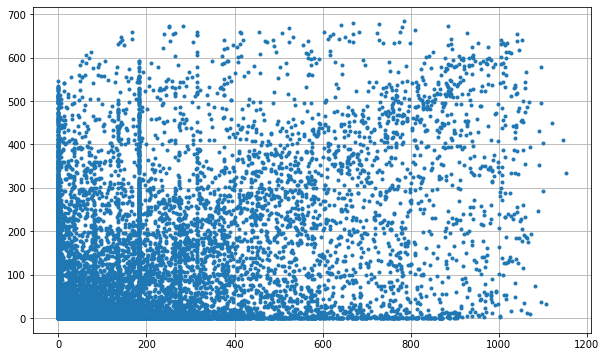

nan
date_forecast
2019-01-01 00:00:00    0.000000e+00
2019-01-01 01:00:00    0.000000e+00
2019-01-01 02:00:00    0.000000e+00
2019-01-01 03:00:00    0.000000e+00
2019-01-01 04:00:00    0.000000e+00
                           ...     
2022-05-02 10:00:00    5.236229e+05
2022-05-02 11:00:00    8.649941e+05
2022-05-02 12:00:00    1.062403e+06
2022-05-02 13:00:00    8.923816e+05
2022-05-02 14:00:00    8.699742e+05
Freq: H, Name: direct_rad_1h:J, Length: 29223, dtype: float32
Column Name :  direct_rad_1h:J


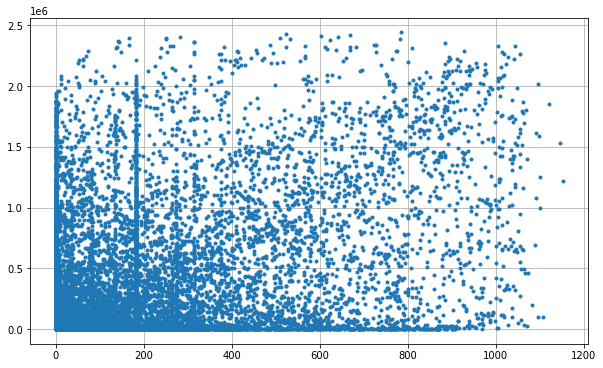

nan
date_forecast
2019-01-01 00:00:00    81.824997
2019-01-01 01:00:00    97.474998
2019-01-01 02:00:00    96.425003
2019-01-01 03:00:00    96.775002
2019-01-01 04:00:00    96.724998
                         ...    
2022-05-02 10:00:00    79.974998
2022-05-02 11:00:00    65.474998
2022-05-02 12:00:00    51.075001
2022-05-02 13:00:00    66.349998
2022-05-02 14:00:00    48.575001
Freq: H, Name: effective_cloud_cover:p, Length: 29223, dtype: float32
Column Name :  effective_cloud_cover:p


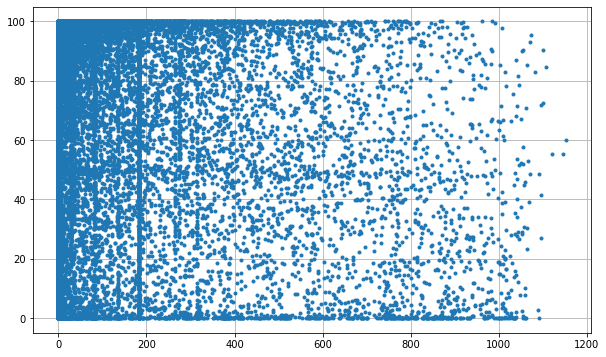

nan
date_forecast
2019-01-01 00:00:00    7.0
2019-01-01 01:00:00    7.0
2019-01-01 02:00:00    7.0
2019-01-01 03:00:00    7.0
2019-01-01 04:00:00    7.0
                      ... 
2022-05-02 10:00:00    7.0
2022-05-02 11:00:00    7.0
2022-05-02 12:00:00    7.0
2022-05-02 13:00:00    7.0
2022-05-02 14:00:00    7.0
Freq: H, Name: elevation:m, Length: 29223, dtype: float32
Column Name :  elevation:m


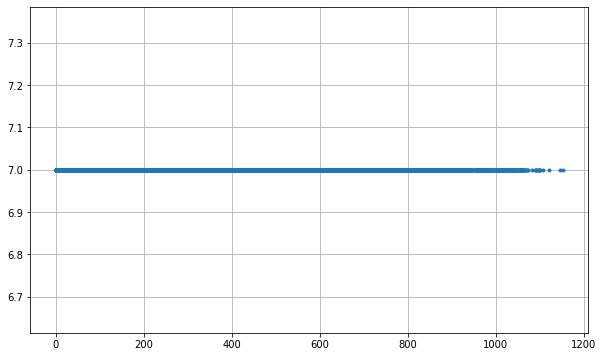

nan
date_forecast
2019-01-01 00:00:00    0.0
2019-01-01 01:00:00    0.0
2019-01-01 02:00:00    0.0
2019-01-01 03:00:00    0.0
2019-01-01 04:00:00    0.0
                      ... 
2022-05-02 10:00:00    0.0
2022-05-02 11:00:00    0.0
2022-05-02 12:00:00    0.0
2022-05-02 13:00:00    0.0
2022-05-02 14:00:00    0.0
Freq: H, Name: fresh_snow_12h:cm, Length: 29223, dtype: float32
Column Name :  fresh_snow_12h:cm


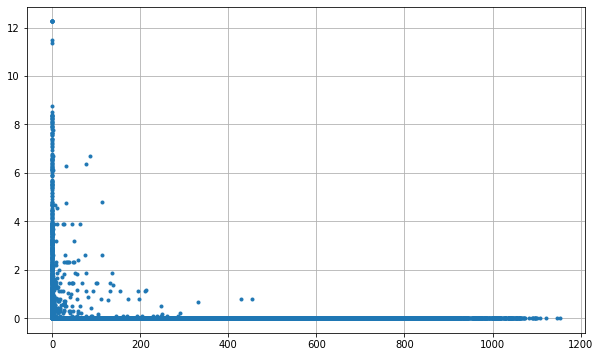

nan
date_forecast
2019-01-01 00:00:00    0.0
2019-01-01 01:00:00    0.0
2019-01-01 02:00:00    0.0
2019-01-01 03:00:00    0.0
2019-01-01 04:00:00    0.0
                      ... 
2022-05-02 10:00:00    0.0
2022-05-02 11:00:00    0.0
2022-05-02 12:00:00    0.0
2022-05-02 13:00:00    0.0
2022-05-02 14:00:00    0.0
Freq: H, Name: fresh_snow_1h:cm, Length: 29223, dtype: float32
Column Name :  fresh_snow_1h:cm


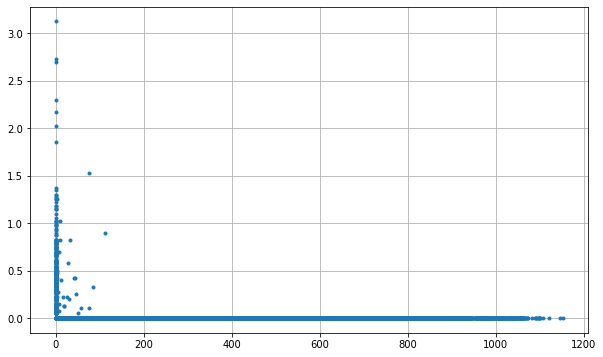

nan
date_forecast
2019-01-01 00:00:00    0.0
2019-01-01 01:00:00    0.0
2019-01-01 02:00:00    0.0
2019-01-01 03:00:00    0.0
2019-01-01 04:00:00    0.0
                      ... 
2022-05-02 10:00:00    0.0
2022-05-02 11:00:00    0.0
2022-05-02 12:00:00    0.0
2022-05-02 13:00:00    0.0
2022-05-02 14:00:00    0.0
Freq: H, Name: fresh_snow_24h:cm, Length: 29223, dtype: float32
Column Name :  fresh_snow_24h:cm


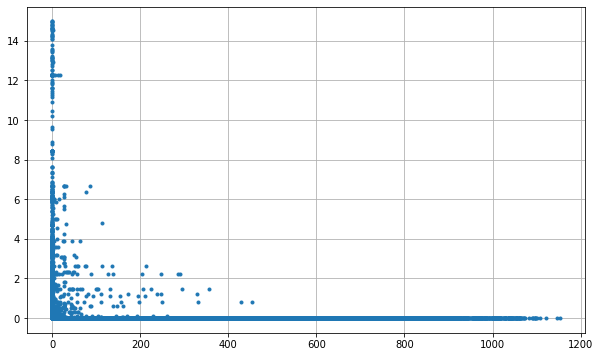

nan
date_forecast
2019-01-01 00:00:00    0.0
2019-01-01 01:00:00    0.0
2019-01-01 02:00:00    0.0
2019-01-01 03:00:00    0.0
2019-01-01 04:00:00    0.0
                      ... 
2022-05-02 10:00:00    0.0
2022-05-02 11:00:00    0.0
2022-05-02 12:00:00    0.0
2022-05-02 13:00:00    0.0
2022-05-02 14:00:00    0.0
Freq: H, Name: fresh_snow_3h:cm, Length: 29223, dtype: float32
Column Name :  fresh_snow_3h:cm


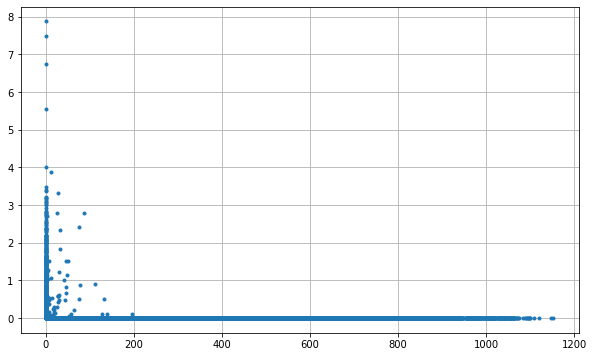

nan
date_forecast
2019-01-01 00:00:00    0.0
2019-01-01 01:00:00    0.0
2019-01-01 02:00:00    0.0
2019-01-01 03:00:00    0.0
2019-01-01 04:00:00    0.0
                      ... 
2022-05-02 10:00:00    0.0
2022-05-02 11:00:00    0.0
2022-05-02 12:00:00    0.0
2022-05-02 13:00:00    0.0
2022-05-02 14:00:00    0.0
Freq: H, Name: fresh_snow_6h:cm, Length: 29223, dtype: float32
Column Name :  fresh_snow_6h:cm


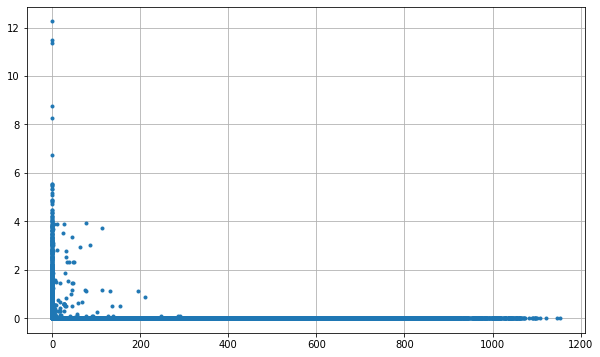

nan
date_forecast
2019-01-01 00:00:00    0.0
2019-01-01 01:00:00    0.0
2019-01-01 02:00:00    0.0
2019-01-01 03:00:00    0.0
2019-01-01 04:00:00    0.0
                      ... 
2022-05-02 10:00:00    1.0
2022-05-02 11:00:00    1.0
2022-05-02 12:00:00    1.0
2022-05-02 13:00:00    1.0
2022-05-02 14:00:00    1.0
Freq: H, Name: is_day:idx, Length: 29223, dtype: float32
Column Name :  is_day:idx


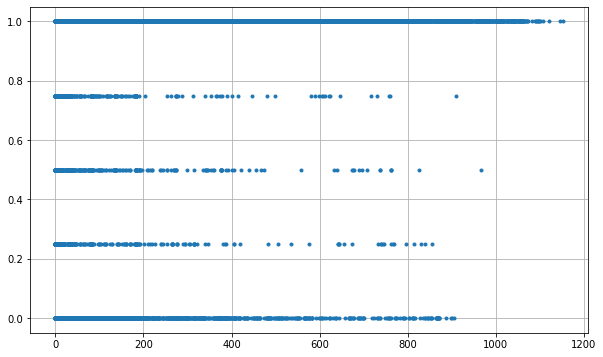

nan
date_forecast
2019-01-01 00:00:00    1.0
2019-01-01 01:00:00    1.0
2019-01-01 02:00:00    1.0
2019-01-01 03:00:00    1.0
2019-01-01 04:00:00    1.0
                      ... 
2022-05-02 10:00:00    0.0
2022-05-02 11:00:00    0.0
2022-05-02 12:00:00    0.0
2022-05-02 13:00:00    0.0
2022-05-02 14:00:00    0.0
Freq: H, Name: is_in_shadow:idx, Length: 29223, dtype: float32
Column Name :  is_in_shadow:idx


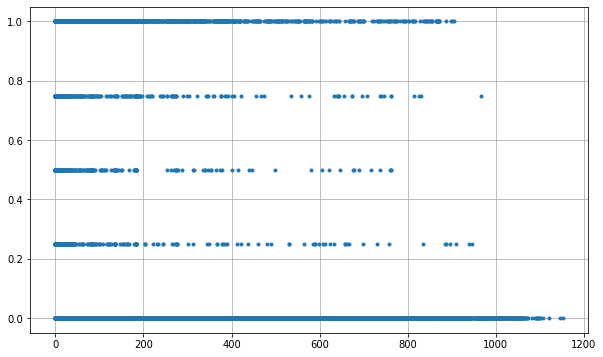

nan
date_forecast
2019-01-01 00:00:00     987.000000
2019-01-01 01:00:00     986.150024
2019-01-01 02:00:00     985.950012
2019-01-01 03:00:00     986.250000
2019-01-01 04:00:00     986.775024
                          ...     
2022-05-02 10:00:00    1007.799988
2022-05-02 11:00:00    1008.349976
2022-05-02 12:00:00    1009.125000
2022-05-02 13:00:00    1009.799988
2022-05-02 14:00:00    1010.599976
Freq: H, Name: msl_pressure:hPa, Length: 29223, dtype: float32
Column Name :  msl_pressure:hPa


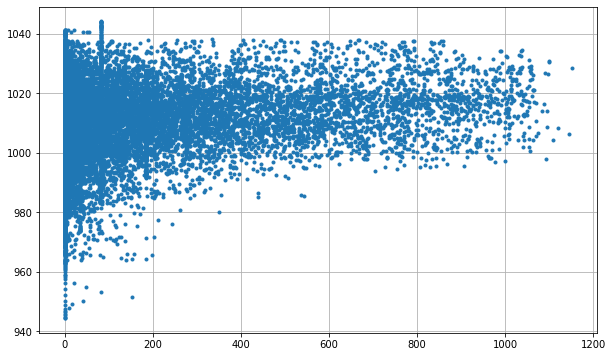

nan
date_forecast
2019-01-01 00:00:00    0.0375
2019-01-01 01:00:00    0.0125
2019-01-01 02:00:00    0.0000
2019-01-01 03:00:00    0.0450
2019-01-01 04:00:00    0.0150
                        ...  
2022-05-02 10:00:00    0.0000
2022-05-02 11:00:00    0.0300
2022-05-02 12:00:00    0.0175
2022-05-02 13:00:00    0.0600
2022-05-02 14:00:00    0.0200
Freq: H, Name: precip_5min:mm, Length: 29223, dtype: float32
Column Name :  precip_5min:mm


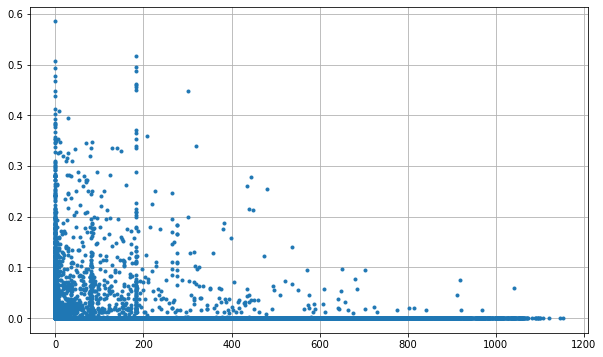

nan
date_forecast
2019-01-01 00:00:00    0.75
2019-01-01 01:00:00    0.25
2019-01-01 02:00:00    0.00
2019-01-01 03:00:00    0.75
2019-01-01 04:00:00    0.25
                       ... 
2022-05-02 10:00:00    0.00
2022-05-02 11:00:00    0.50
2022-05-02 12:00:00    0.25
2022-05-02 13:00:00    0.25
2022-05-02 14:00:00    0.25
Freq: H, Name: precip_type_5min:idx, Length: 29223, dtype: float32
Column Name :  precip_type_5min:idx


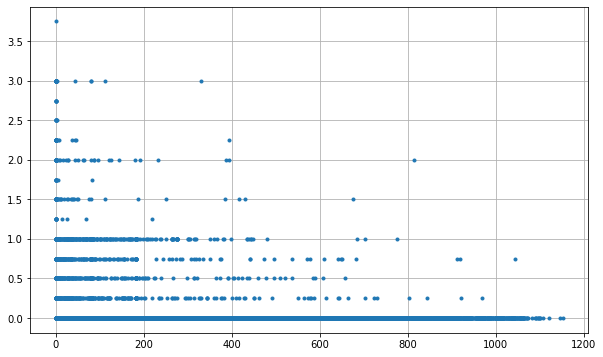

nan
date_forecast
2019-01-01 00:00:00    974.099976
2019-01-01 01:00:00    973.250000
2019-01-01 02:00:00    973.049988
2019-01-01 03:00:00    973.349976
2019-01-01 04:00:00    973.875000
                          ...    
2022-05-02 10:00:00    994.724976
2022-05-02 11:00:00    995.275024
2022-05-02 12:00:00    996.075012
2022-05-02 13:00:00    996.700012
2022-05-02 14:00:00    997.500000
Freq: H, Name: pressure_100m:hPa, Length: 29223, dtype: float32
Column Name :  pressure_100m:hPa


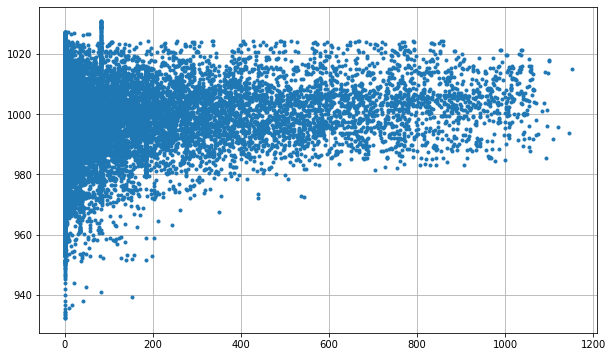

nan
date_forecast
2019-01-01 00:00:00     980.174988
2019-01-01 01:00:00     979.325012
2019-01-01 02:00:00     979.099976
2019-01-01 03:00:00     979.349976
2019-01-01 04:00:00     979.900024
                          ...     
2022-05-02 10:00:00    1000.825012
2022-05-02 11:00:00    1001.375000
2022-05-02 12:00:00    1002.200012
2022-05-02 13:00:00    1002.799988
2022-05-02 14:00:00    1003.625000
Freq: H, Name: pressure_50m:hPa, Length: 29223, dtype: float32
Column Name :  pressure_50m:hPa


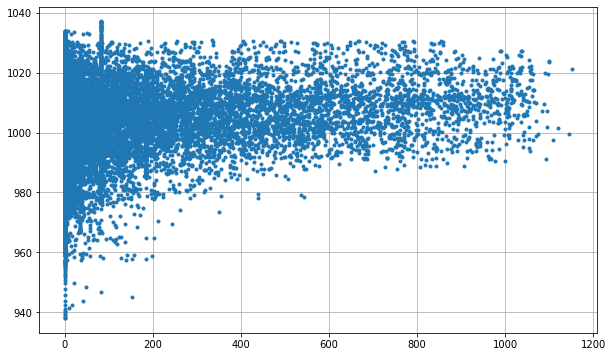

nan
date_forecast
2019-01-01 00:00:00    0.0
2019-01-01 01:00:00    0.0
2019-01-01 02:00:00    0.0
2019-01-01 03:00:00    0.0
2019-01-01 04:00:00    0.0
                      ... 
2022-05-02 10:00:00    0.0
2022-05-02 11:00:00    0.0
2022-05-02 12:00:00    0.0
2022-05-02 13:00:00    0.0
2022-05-02 14:00:00    0.0
Freq: H, Name: prob_rime:p, Length: 29223, dtype: float32
Column Name :  prob_rime:p


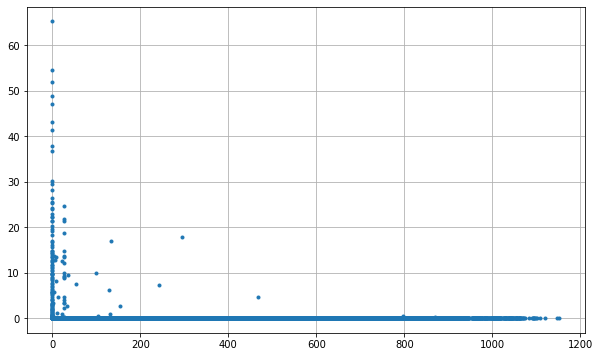

nan
date_forecast
2019-01-01 00:00:00    0.0
2019-01-01 01:00:00    0.0
2019-01-01 02:00:00    0.0
2019-01-01 03:00:00    0.0
2019-01-01 04:00:00    0.0
                      ... 
2022-05-02 10:00:00    0.0
2022-05-02 11:00:00    0.0
2022-05-02 12:00:00    0.0
2022-05-02 13:00:00    0.0
2022-05-02 14:00:00    0.0
Freq: H, Name: rain_water:kgm2, Length: 29223, dtype: float32
Column Name :  rain_water:kgm2


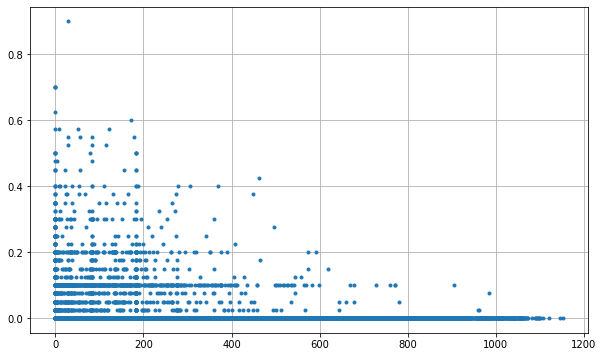

nan
date_forecast
2019-01-01 00:00:00    89.099998
2019-01-01 01:00:00    88.425003
2019-01-01 02:00:00    87.300003
2019-01-01 03:00:00    88.400002
2019-01-01 04:00:00    91.275002
                         ...    
2022-05-02 10:00:00    68.149994
2022-05-02 11:00:00    71.474998
2022-05-02 12:00:00    71.925003
2022-05-02 13:00:00    75.150002
2022-05-02 14:00:00    68.000000
Freq: H, Name: relative_humidity_1000hPa:p, Length: 29223, dtype: float32
Column Name :  relative_humidity_1000hPa:p


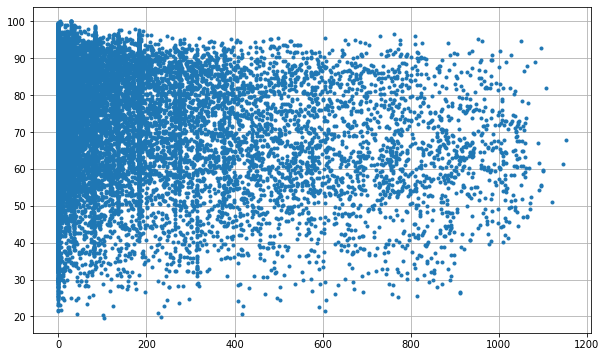

nan
date_forecast
2019-01-01 00:00:00     986.224976
2019-01-01 01:00:00     985.400024
2019-01-01 02:00:00     985.174988
2019-01-01 03:00:00     985.450012
2019-01-01 04:00:00     985.974976
                          ...     
2022-05-02 10:00:00    1006.950012
2022-05-02 11:00:00    1007.525024
2022-05-02 12:00:00    1008.325012
2022-05-02 13:00:00    1009.000000
2022-05-02 14:00:00    1009.799988
Freq: H, Name: sfc_pressure:hPa, Length: 29223, dtype: float32
Column Name :  sfc_pressure:hPa


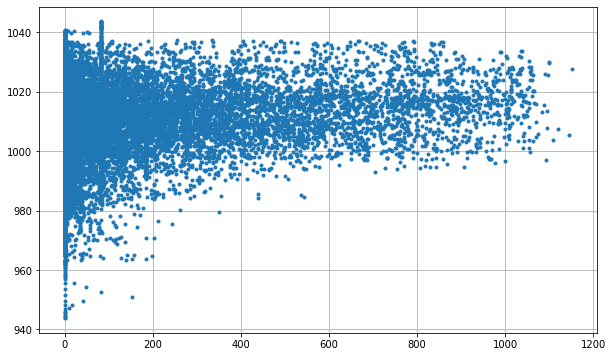

nan
date_forecast
2019-01-01 00:00:00   NaN
2019-01-01 01:00:00   NaN
2019-01-01 02:00:00   NaN
2019-01-01 03:00:00   NaN
2019-01-01 04:00:00   NaN
                       ..
2022-05-02 10:00:00   NaN
2022-05-02 11:00:00   NaN
2022-05-02 12:00:00   NaN
2022-05-02 13:00:00   NaN
2022-05-02 14:00:00   NaN
Freq: H, Name: snow_density:kgm3, Length: 29223, dtype: float32
Column Name :  snow_density:kgm3


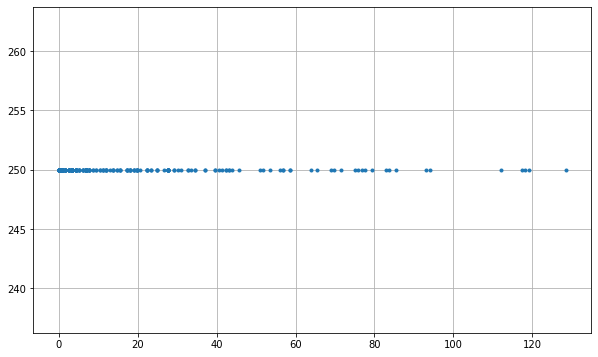

nan
date_forecast
2019-01-01 00:00:00    0.0
2019-01-01 01:00:00    0.0
2019-01-01 02:00:00    0.0
2019-01-01 03:00:00    0.0
2019-01-01 04:00:00    0.0
                      ... 
2022-05-02 10:00:00    0.0
2022-05-02 11:00:00    0.0
2022-05-02 12:00:00    0.0
2022-05-02 13:00:00    0.0
2022-05-02 14:00:00    0.0
Freq: H, Name: snow_depth:cm, Length: 29223, dtype: float32
Column Name :  snow_depth:cm


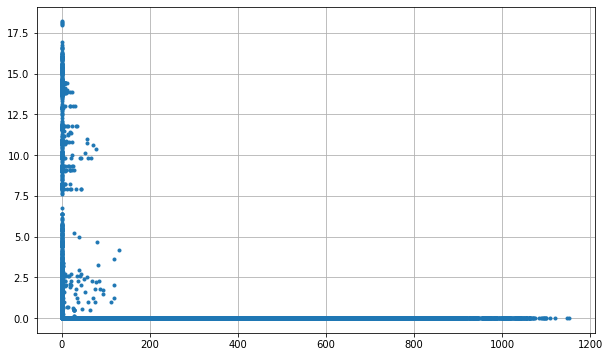

nan
date_forecast
2019-01-01 00:00:00    0.0
2019-01-01 01:00:00    0.0
2019-01-01 02:00:00    0.0
2019-01-01 03:00:00    0.0
2019-01-01 04:00:00    0.0
                      ... 
2022-05-02 10:00:00    0.0
2022-05-02 11:00:00    0.0
2022-05-02 12:00:00    0.0
2022-05-02 13:00:00    0.0
2022-05-02 14:00:00    0.0
Freq: H, Name: snow_drift:idx, Length: 29223, dtype: float32
Column Name :  snow_drift:idx


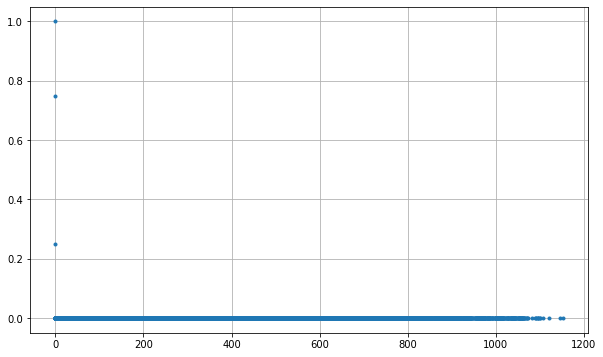

nan
date_forecast
2019-01-01 00:00:00    0.0
2019-01-01 01:00:00    0.0
2019-01-01 02:00:00    0.0
2019-01-01 03:00:00    0.0
2019-01-01 04:00:00    0.0
                      ... 
2022-05-02 10:00:00    0.0
2022-05-02 11:00:00    0.0
2022-05-02 12:00:00    0.0
2022-05-02 13:00:00    0.0
2022-05-02 14:00:00    0.0
Freq: H, Name: snow_melt_10min:mm, Length: 29223, dtype: float32
Column Name :  snow_melt_10min:mm


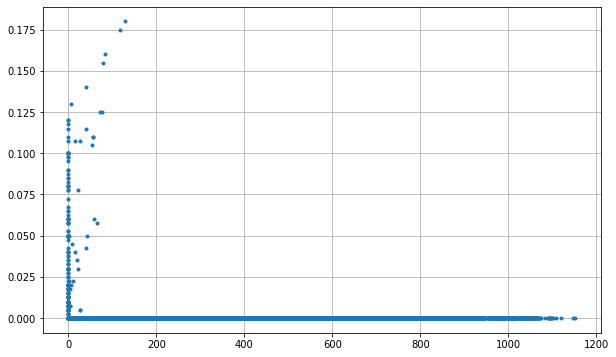

nan
date_forecast
2019-01-01 00:00:00    0.05
2019-01-01 01:00:00    0.10
2019-01-01 02:00:00    0.10
2019-01-01 03:00:00    0.10
2019-01-01 04:00:00    0.10
                       ... 
2022-05-02 10:00:00    0.10
2022-05-02 11:00:00    0.05
2022-05-02 12:00:00    0.00
2022-05-02 13:00:00    0.05
2022-05-02 14:00:00    0.00
Freq: H, Name: snow_water:kgm2, Length: 29223, dtype: float32
Column Name :  snow_water:kgm2


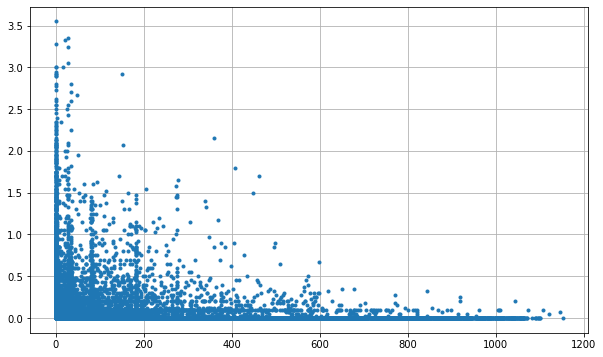

nan
date_forecast
2019-01-01 00:00:00     20.724251
2019-01-01 01:00:00     40.307251
2019-01-01 02:00:00     57.805000
2019-01-01 03:00:00     73.371002
2019-01-01 04:00:00     87.514999
                          ...    
2022-05-02 10:00:00    162.731506
2022-05-02 11:00:00    182.034256
2022-05-02 12:00:00    201.222992
2022-05-02 13:00:00    219.339249
2022-05-02 14:00:00    235.935242
Freq: H, Name: sun_azimuth:d, Length: 29223, dtype: float32
Column Name :  sun_azimuth:d


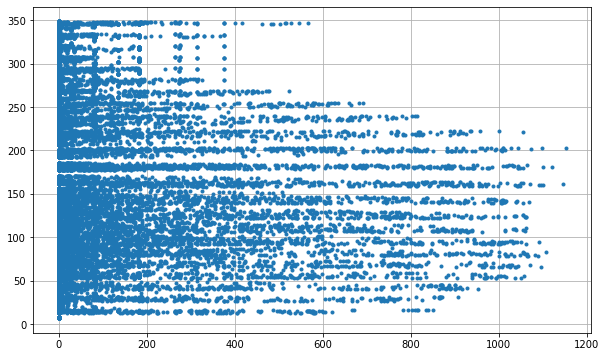

nan
date_forecast
2019-01-01 00:00:00   -48.319252
2019-01-01 01:00:00   -44.919750
2019-01-01 02:00:00   -39.863998
2019-01-01 03:00:00   -33.769001
2019-01-01 04:00:00   -27.167500
                         ...    
2022-05-02 10:00:00    40.887501
2022-05-02 11:00:00    41.775249
2022-05-02 12:00:00    40.425499
2022-05-02 13:00:00    37.049248
2022-05-02 14:00:00    32.103001
Freq: H, Name: sun_elevation:d, Length: 29223, dtype: float32
Column Name :  sun_elevation:d


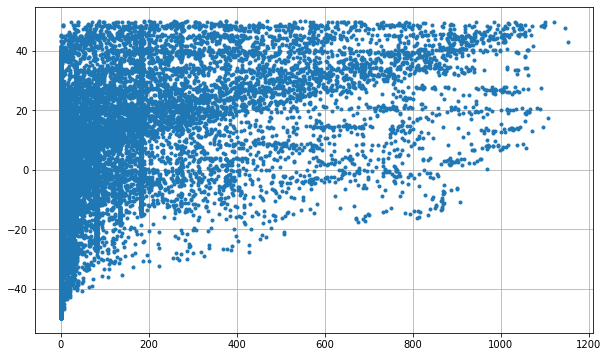

nan
date_forecast
2019-01-01 00:00:00    0.000
2019-01-01 01:00:00    0.000
2019-01-01 02:00:00    0.100
2019-01-01 03:00:00    0.200
2019-01-01 04:00:00    0.175
                       ...  
2022-05-02 10:00:00    0.050
2022-05-02 11:00:00    0.000
2022-05-02 12:00:00    0.000
2022-05-02 13:00:00    0.000
2022-05-02 14:00:00    0.000
Freq: H, Name: super_cooled_liquid_water:kgm2, Length: 29223, dtype: float32
Column Name :  super_cooled_liquid_water:kgm2


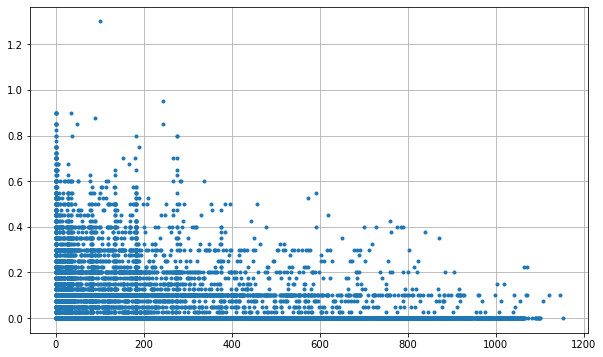

nan
date_forecast
2019-01-01 00:00:00    278.250000
2019-01-01 01:00:00    278.075012
2019-01-01 02:00:00    278.049988
2019-01-01 03:00:00    277.600006
2019-01-01 04:00:00    277.649994
                          ...    
2022-05-02 10:00:00    278.575012
2022-05-02 11:00:00    278.450012
2022-05-02 12:00:00    278.549988
2022-05-02 13:00:00    278.399994
2022-05-02 14:00:00    278.475006
Freq: H, Name: t_1000hPa:K, Length: 29223, dtype: float32
Column Name :  t_1000hPa:K


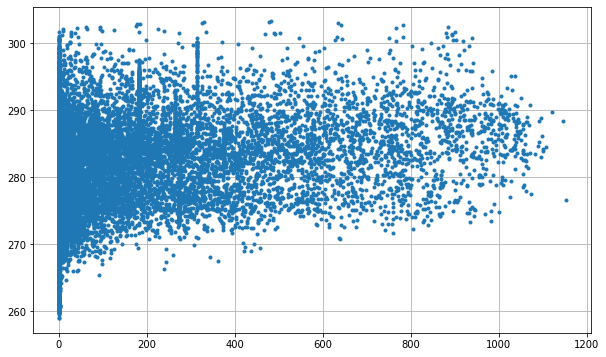

nan
date_forecast
2019-01-01 00:00:00    86.324997
2019-01-01 01:00:00    99.074997
2019-01-01 02:00:00    97.925003
2019-01-01 03:00:00    97.224998
2019-01-01 04:00:00    96.824997
                         ...    
2022-05-02 10:00:00    79.974998
2022-05-02 11:00:00    65.474998
2022-05-02 12:00:00    51.100002
2022-05-02 13:00:00    66.400002
2022-05-02 14:00:00    48.575001
Freq: H, Name: total_cloud_cover:p, Length: 29223, dtype: float32
Column Name :  total_cloud_cover:p


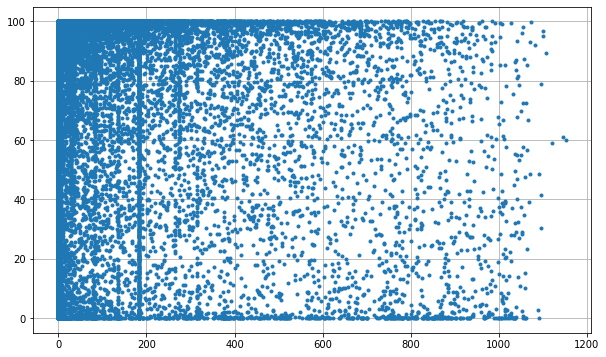

nan
date_forecast
2019-01-01 00:00:00    16827.800781
2019-01-01 01:00:00    12777.449219
2019-01-01 02:00:00    11140.500000
2019-01-01 03:00:00     6799.200195
2019-01-01 04:00:00     5580.475098
                           ...     
2022-05-02 10:00:00    13029.674805
2022-05-02 11:00:00    16180.074219
2022-05-02 12:00:00    24076.375000
2022-05-02 13:00:00    24841.650391
2022-05-02 14:00:00    19591.849609
Freq: H, Name: visibility:m, Length: 29223, dtype: float32
Column Name :  visibility:m


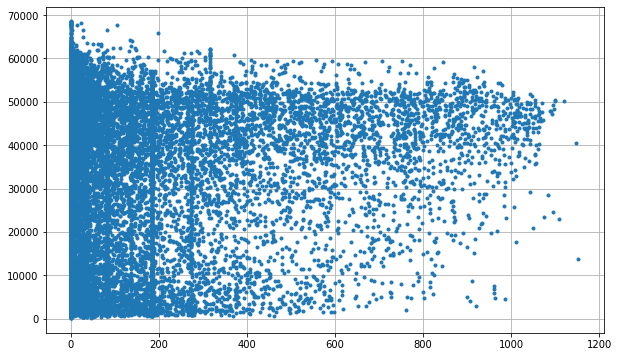

nan
date_forecast
2019-01-01 00:00:00     2.800
2019-01-01 01:00:00     3.550
2019-01-01 02:00:00     4.025
2019-01-01 03:00:00     4.900
2019-01-01 04:00:00     6.050
                        ...  
2022-05-02 10:00:00    10.375
2022-05-02 11:00:00     9.900
2022-05-02 12:00:00     9.600
2022-05-02 13:00:00     8.250
2022-05-02 14:00:00     7.325
Freq: H, Name: wind_speed_10m:ms, Length: 29223, dtype: float32
Column Name :  wind_speed_10m:ms


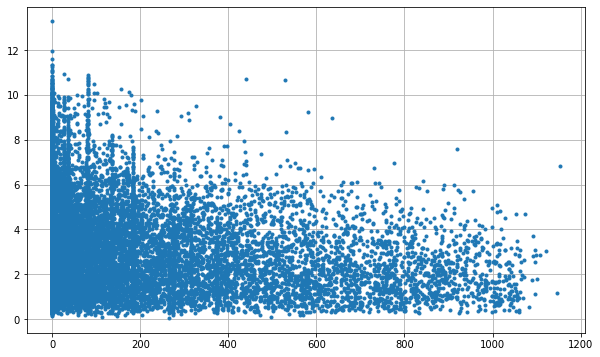

nan
date_forecast
2019-01-01 00:00:00     1.175
2019-01-01 01:00:00     1.525
2019-01-01 02:00:00     2.150
2019-01-01 03:00:00     3.425
2019-01-01 04:00:00     5.575
                        ...  
2022-05-02 10:00:00    10.325
2022-05-02 11:00:00     9.550
2022-05-02 12:00:00     9.025
2022-05-02 13:00:00     7.850
2022-05-02 14:00:00     6.050
Freq: H, Name: wind_speed_u_10m:ms, Length: 29223, dtype: float32
Column Name :  wind_speed_u_10m:ms


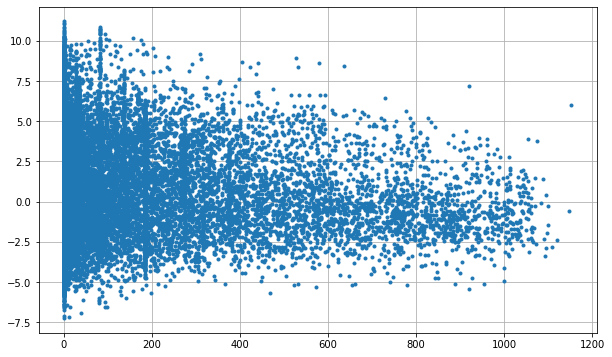

nan
date_forecast
2019-01-01 00:00:00    2.550
2019-01-01 01:00:00    3.200
2019-01-01 02:00:00    3.425
2019-01-01 03:00:00    3.500
2019-01-01 04:00:00    2.200
                       ...  
2022-05-02 10:00:00   -0.975
2022-05-02 11:00:00   -2.575
2022-05-02 12:00:00   -3.200
2022-05-02 13:00:00   -2.400
2022-05-02 14:00:00   -4.050
Freq: H, Name: wind_speed_v_10m:ms, Length: 29223, dtype: float32
Column Name :  wind_speed_v_10m:ms


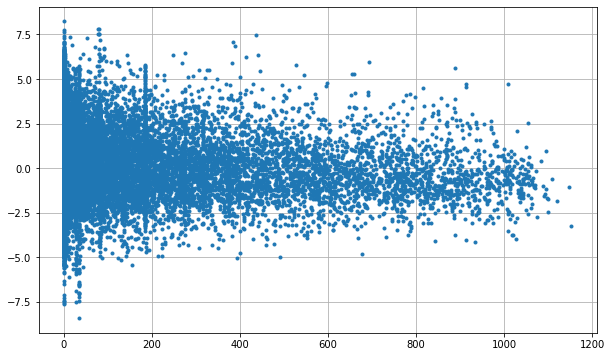

nan
date_forecast
2019-01-01 00:00:00    0.0
2019-01-01 01:00:00    0.0
2019-01-01 02:00:00    0.0
2019-01-01 03:00:00    0.0
2019-01-01 04:00:00    0.0
                      ... 
2022-05-02 10:00:00    0.0
2022-05-02 11:00:00    0.0
2022-05-02 12:00:00    0.0
2022-05-02 13:00:00    0.0
2022-05-02 14:00:00    0.0
Freq: H, Name: wind_speed_w_1000hPa:ms, Length: 29223, dtype: float32
Column Name :  wind_speed_w_1000hPa:ms


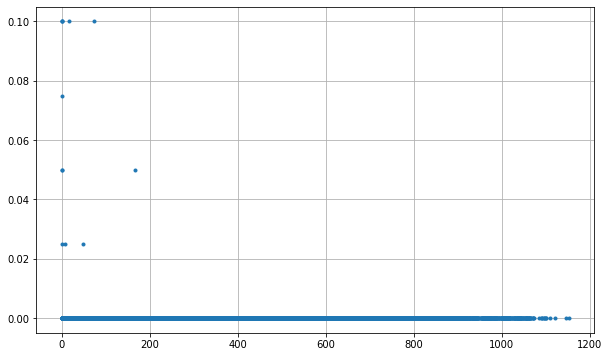

5733.42
date_forecast
2019-01-01 00:00:00    5.475
2019-01-01 01:00:00    5.350
2019-01-01 02:00:00    5.350
2019-01-01 03:00:00    5.300
2019-01-01 04:00:00    5.625
                       ...  
2022-05-01 08:00:00    5.200
2022-05-01 09:00:00    5.100
2022-05-01 10:00:00    5.000
2022-05-01 11:00:00    5.000
2022-05-01 12:00:00    5.000
Freq: H, Name: absolute_humidity_2m:gm3, Length: 29197, dtype: float32
Column Name :  absolute_humidity_2m:gm3


ValueError: x and y must have same first dimension, but have shapes (25537,) and (29197,)

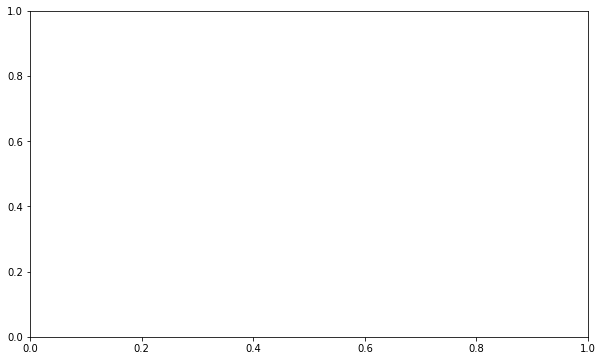

In [22]:
for column in hourly_X_train_obs_a.columns:
    power = filtered_df_a["pv_measurement"]
    power = power.values.flatten()
    print(power.max())
    print(hourly_X_train_obs_a[column])
    print('Column Name : ', column)
    plt.figure(figsize=(10, 6))
    plt.plot(power, hourly_X_train_obs_a[column].to_numpy(), marker='.', linestyle='')
    plt.grid(True)
    plt.show()

hourly_X_train_obs_b.drop(hourly_X_train_obs_b.tail(9).index,inplace=True)
for column in hourly_X_train_obs_b.columns:
    power_b = filtered_df_b["pv_measurement"]
    power_b = power_b.values.flatten()
    print(power_b.max())
    print(hourly_X_train_obs_b[column])
    print('Column Name : ', column)
    plt.figure(figsize=(10, 6))
    plt.plot(power_b, hourly_X_train_obs_b[column].to_numpy(), marker='.', linestyle='')
    plt.grid(True)
    plt.show()

# C data frame misses a lot of values in the middle of 2022
# hourly_X_train_obs_c.drop(hourly_X_train_obs_c.tail(9).index,inplace=True)
# for column in hourly_X_train_obs_c.columns:
#     power_c = filtered_df_c["pv_measurement"]
#     power_c = power_c.values.flatten()
#     print(power_c.max())
#     print(hourly_X_train_obs_c[column])
#     print('Column Name : ', column)
#     plt.figure(figsize=(10, 6))
#     plt.plot(power_c, hourly_X_train_obs_c[column].to_numpy(), marker='.', linestyle='')
#     plt.grid(True)
#     plt.show()

In [2]:
## Elevation and snow drift are constant, so we drop them as they dont do anything for the predictions

In [27]:
max_date = X_train_observed_b['date_forecast'].iloc[-1]
print(max_date)
train_b['time'] = pd.to_datetime(train_b['time'])
filtered_df_b = train_b[train_b['time'] <= max_date]
print(filtered_df_b['time'].iloc[-1])
X_train_observed_b['date_forecast_dt'] = pd.to_datetime(X_train_observed_b['date_forecast'])
X_train_observed_b.set_index('date_forecast_dt', inplace=True)

hourly_X_train_obs_b = X_train_observed_b.resample('H').mean()
hourly_X_train_obs_b = hourly_X_train_obs_b.iloc[:-10]

date_forecast
2019     947.444745
2020    1343.293789
2021    1436.071198
2022    1205.563620
Name: pv_measurement, dtype: float64


In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(train_c['time'], train_c['pv_measurement'])
plt.grid(True)
plt.show()

In [57]:
print(X_train_observed_b.columns)
X_train_observed_b['date_forecast'] = pd.to_datetime(X_train_observed_b['date_forecast'])

# Extract time of day
X_train_observed_b['time_of_day'] = X_train_observed_b['date_forecast'].dt.time
X_train_observed_b['minutes_since_midnight'] = X_train_observed_b['time_of_day'].apply(lambda x: x.hour * 60 + x.minute)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(X_train_observed_b['minutes_since_midnight'].to_numpy(), X_train_observed_b['sun_elevation:d'].to_numpy(), marker='.')
plt.xlabel('Time of Day')
plt.ylabel('Sun Elevation')
plt.title('Sun Elevation vs Time of Day')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
df, tuning_data, x_test = utils.preprocess_category_estimated_observed('A')
#df = pd.read_csv('raw_predictions/ABC_A.csv')
df['date_forecast'] = pd.to_datetime(df['date_forecast'])
mask = (df['date_forecast'].dt.month >= 5) & (df['date_forecast'].dt.month <= 7) & (df['date_forecast'].dt.day >= 1) & ((df['date_forecast'].dt.month != 7) | (df['date_forecast'].dt.day <= 3))
filtered_df = df.loc[mask]

# Group by year and calculate the average of 'pv_measurement'
average_pv_measurement = filtered_df.groupby(filtered_df['date_forecast'].dt.year)['pv_measurement'].mean()


Wrote this file: submission_43200overnight_long_test_attempt_merged_


In [12]:
print(average_pv_measurement)

Total data points: 26095
Data points to be removed: 2110


In [13]:
# Util functions

def onehot_months(df):
    new_df = df.copy()
    new_df['month'] = df['date_forecast'].dt.month
    # Perform one-hot encoding
    new_df = pd.get_dummies(new_df, columns=['month', ])
    for i in range(12):
        if not f'month_{i + 1}' in new_df:
            new_df[f'month_{i + 1}'] = False

    return new_df


def onehot_hours(df):
    new_df = df.copy()
    new_df['hour'] = df['date_forecast'].dt.hour
    # Perform one-hot encoding
    new_df = pd.get_dummies(new_df, columns=['hour', ])

    return new_df


def concat_observed_estimated(obs_df, est_df):
    new_df = pd.concat([obs_df, est_df], ignore_index=True)
    return new_df


def merge_train_target(train_df, target_df):
    merged_df = target_df.merge(train_df, left_on='time', right_on='date_forecast')
    return merged_df


def clean_target_data(target_df, zero_threshold=150, constant_value_threshold=1):
    # This method removes any sets in the data where there are 150 or more consecutive identical values
    target_df = target_df.copy()

    target_df = target_df.dropna(subset=['pv_measurement'])

    zero_sequences = (target_df['pv_measurement'] == 0).astype(int).groupby(
        target_df['pv_measurement'].ne(0).cumsum()).cumsum()
    
    constant_sequences = (target_df['pv_measurement'].eq(target_df['pv_measurement'].shift()) & (
            target_df['pv_measurement'] != 0)).astype(int).groupby(
        target_df['pv_measurement'].ne(target_df['pv_measurement'].shift()).cumsum()).cumsum()

    remove_zeros = zero_sequences > zero_threshold
    remove_constants = constant_sequences > constant_value_threshold

    to_remove = remove_zeros | remove_constants

    total_data_points = len(target_df)
    removed_data_points = to_remove.sum()

    print(f"Total data points: {total_data_points}")
    print(f"Data points to be removed: {removed_data_points}")

    cleaned_target = target_df[~to_remove].reset_index(drop=True)

    return cleaned_target


def preprocess_category_estimated_observed(category: str):
    category = category.upper()

    target_df = pd.read_parquet(f'data/{category}/train_targets.parquet')
    estimated_df = pd.read_parquet(f'data/{category}/X_train_estimated.parquet')
    observed_df = pd.read_parquet(f'data/{category}/X_train_observed.parquet')
    test_df = pd.read_parquet(f'data/{category}/X_test_estimated.parquet')

    cleaned_target = clean_target_data(target_df=target_df)

    # Observed
    observed_df['date_forecast'] = pd.to_datetime(observed_df['date_forecast'])
    observed_df.set_index('date_forecast', inplace=True)
    observed_df = observed_df.resample('H').mean()
    observed_df = observed_df.reset_index()

    observed_df = onehot_hours(observed_df)
    observed_df = onehot_months(observed_df)

    # Estimated
    estimated_df['date_forecast'] = pd.to_datetime(estimated_df['date_forecast'])
    estimated_df.set_index('date_forecast', inplace=True)
    estimated_df = estimated_df.resample('H').mean()
    estimated_df = estimated_df.reset_index()

    estimated_df = onehot_hours(estimated_df)
    estimated_df = onehot_months(estimated_df)

    # Test
    test_df['date_forecast'] = pd.to_datetime(test_df['date_forecast'])
    test_df.set_index('date_forecast', inplace=True)
    test_df = test_df.resample('H').mean()
    preprocessed_test = test_df.reset_index()

    preprocessed_test = onehot_hours(preprocessed_test)
    preprocessed_test = onehot_months(preprocessed_test)

    # Elevation and snow drift are constant in train, so we drop them as they dont do anything for the predictions
    observed_target = merge_train_target(observed_df, cleaned_target)
    observed_target.fillna(0, inplace=True)
    observed_target.drop(['elevation:m', 'snow_drift:idx'], axis=1, inplace=True)

    estimated_target = merge_train_target(estimated_df, cleaned_target)
    estimated_target.fillna(0, inplace=True)
    estimated_target.drop(['elevation:m', 'snow_drift:idx'], axis=1, inplace=True)

    # Sort the columns alphabetically
    return observed_target.reindex(sorted(observed_target.columns), axis=1), \
           estimated_target.reindex(sorted(estimated_target.columns), axis=1), \
           preprocessed_test.reindex(sorted(preprocessed_test.columns), axis=1)


def preprocess_category(category: str):
    category = category.upper()

    target_df = pd.read_parquet(f'data/{category}/train_targets.parquet')
    estimated_df = pd.read_parquet(f'data/{category}/X_train_estimated.parquet')
    observed_df = pd.read_parquet(f'data/{category}/X_train_observed.parquet')
    test_df = pd.read_parquet(f'data/{category}/X_test_estimated.parquet')

    cleaned_target = clean_target_data(target_df=target_df)

    preprocessed_df = concat_observed_estimated(observed_df, estimated_df)

    preprocessed_df['date_forecast'] = pd.to_datetime(preprocessed_df['date_forecast'])
    preprocessed_df.set_index('date_forecast', inplace=True)
    preprocessed_df = preprocessed_df.resample('H').mean()
    preprocessed_df = preprocessed_df.reset_index()

    # One-hot encode both hours of the day and months
    preprocessed_df = onehot_hours(preprocessed_df)
    preprocessed_df = onehot_months(preprocessed_df)

    # Test
    test_df['date_forecast'] = pd.to_datetime(test_df['date_forecast'])
    test_df.set_index('date_forecast', inplace=True)
    test_df = test_df.resample('H').mean()
    preprocessed_test = test_df.reset_index()

    preprocessed_test = onehot_hours(preprocessed_test)
    preprocessed_test = onehot_months(preprocessed_test)

    preprocessed_df = merge_train_target(preprocessed_df, cleaned_target)
    preprocessed_df.fillna(0, inplace=True)

    return preprocessed_df.reindex(sorted(preprocessed_df.columns), axis=1), preprocessed_test.reindex(
        sorted(preprocessed_test.columns), axis=1)


In [14]:
def clean_feature_name(name):
    return name.replace(':', '_').replace('{', '_').replace('}', '_').replace('"', '_')


In [15]:
def objective(trial):
    dtrain = lgb.Dataset(train_a_X, label=train_a_Y)
    param = {
        "objective": "regression",
        "metric": "rmse",
        "verbosity": -1,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, step=0.01),
        "boosting_type": trial.suggest_categorical("boosting_type", ['dart', 'gbdt']),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "verbose": -1
    }

    model = lgb.LGBMRegressor(**param)
    model.fit(train_a_X, train_a_Y)

#     result = cross_val_score(model, train_X_std.values, train_Y.values.ravel(), cv=5, scoring="neg_mean_squared_log_error")
    result = cross_val_score(model, train_a_X.values, train_a_Y.values.ravel(), cv=5, scoring="neg_mean_squared_error")


    tot = 0
    for part in result:
        tot = tot + (-part)
    accuracy = tot/len(result)

    return accuracy


In [16]:
def try_lgbm():
    train_a_X.columns = [clean_feature_name(col) for col in train_a_X.columns]
    test_a.columns = [clean_feature_name(col) for col in test_a.columns]
    print(train_a_X)

    
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=100)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
        
    param = {
        "objective": "regression",
        "metric": "rmse",
        "verbosity": -1,
        "learning_rate": 0.04,
        "boosting_type":  'gbdt',
        "lambda_l1": 0.02881645852127883,
        "lambda_l2": 0.3031128635062045,
        "num_leaves": 15,
        "feature_fraction": 0.9285965761166466,
        "bagging_fraction": 0.9715141232509082,
        "bagging_freq": 7,
        "min_child_samples": 19,
        "verbose": -1
    }

    model = lgb.LGBMRegressor(**param)
    model.fit(train_a_X, train_a_Y)
    prediction = model.predict(test_a)
    preds = pd.DataFrame()
    preds['date_forecast'] = test['date_forecast']
    preds['prediction'] = np.asarray(prediction)

    preds['prediction'] = preds['prediction'].where(preds['prediction'] >= 0, 0)

    preds.to_csv('lgbm_c.csv', index=False)

In [58]:
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
import utils
import numpy as np
import random
import string
from autogluon.common import space


def do_prediction(location, limit, name):
    x_train, tuning_data, x_test = utils.preprocess_category_estimated_observed(location)
    x_train.drop(["time"], axis=1, inplace=True)
    tuning_data.drop(["time"], axis=1, inplace=True)

    x_train['date_forecast'] = pd.to_datetime(x_train['date_forecast'])
    tuning_data['date_forecast'] = pd.to_datetime(tuning_data['date_forecast'])

    x_test.fillna(0, inplace=True)

    label = 'pv_measurement'
    train_data = TabularDataset(x_train)

    tuning_data = TabularDataset(tuning_data)
    thirty_percent_index = int(len(tuning_data) * 0.3)
    tuning_data = tuning_data.iloc[:thirty_percent_index]

    test_data = TabularDataset(x_test)

    predictor = TabularPredictor(label=label,
                                 path="AutoGluonTesting",
                                 eval_metric='mean_absolute_error')
    
    nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 100,  # number of training epochs (controls training time of NN models)
    'learning_rate': space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
    }

    gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
        'num_boost_round': 500,  # number of boosting rounds (controls training time of GBM models)
        'num_leaves': space.Int(lower=20, upper=80, default=36),
        'extra_trees': True,
    }

    hyperparameters = {  # hyperparameters of each model type
                       'NN_TORCH': nn_options,
                        'GBM': [gbm_options, 'GBMLarge'],
                        'CAT': {},
                        'XGB': {},
                        'FASTAI': {},
                        'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
                        'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
                        'KNN': [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}}, {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}}]
                      }  # When these keys are missing from hyperparameters dict, no models of that type are trained

    num_trials = 50  # try at most 50 different hyperparameter configurations for each type of model
    search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

    hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
        'num_trials': num_trials,
        'scheduler' : 'local',
        'searcher': search_strategy,
    }
    
    predictor.fit(train_data,
                  time_limit=limit,
                  tuning_data=tuning_data, 
                  hyperparameters=hyperparameters,
                  hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,)

    y_pred = predictor.predict(test_data)

    print(y_pred)
    preds = pd.DataFrame()
    preds['date_forecast'] = x_test['date_forecast']
    preds['predicted'] = np.asarray(y_pred)
    preds.to_csv(str(limit) + name + '_' + location + '.csv')
    print('Done with Location: ' + location + "================================================================")


def do_prediction_no_tuning(location, limit):
    x_train, x_test = utils.preprocess_category(location)
    x_train.drop(["time"], axis=1, inplace=True)

    x_train['date_forecast'] = pd.to_datetime(x_train['date_forecast'])

    x_test.fillna(0, inplace=True)

    label = 'pv_measurement'
    train_data = TabularDataset(x_train)

    test_data = TabularDataset(x_test)

    predictor = TabularPredictor(label=label,
                                 path="AutoGluonTesting",
                                 eval_metric='mean_absolute_error')

    predictor.fit(train_data,
                  time_limit=time_limit,
                  presets=['high_quality'])

    y_pred = predictor.predict(test_data)

    print(y_pred)
    preds = pd.DataFrame()
    preds['date_forecast'] = x_test['date_forecast']
    preds['predicted'] = np.asarray(y_pred)
    random_string = ''.join(random.choices(string.ascii_uppercase, k=4))
    preds.to_csv(str(limit) + random_string + '_' + location + '.csv')
    print('Done with Location: ' + location + "================================================================")


time_limit = 180 * 60
name="tester_long_12hours"
do_prediction('A', time_limit, name)
do_prediction('B', time_limit, name)
do_prediction('C', time_limit, name)


ModuleNotFoundError: No module named 'autogluon'